In [1]:
#Importing libraries required for the case study and to plot charts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Regular Expressions for String manipulation
import re

# Ignore warnings due to version problems
import warnings
warnings.filterwarnings('ignore')

Bạn muốn download file xuống thì chạy code này nha

In [2]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("abhishek14398/loan-dataset")

# print("Path to dataset files:", path)

**Đọc FILE**

In [3]:
#ĐỌc file csv
df = pd.read_csv('loan.csv')

#đọc file xlsx
df_1 = pd.read_excel('Data_Dictionary.xlsx')



In [4]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_1

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...
115,NaN,NaN


**Kiểm tra có các cột nào trùng nhau**

In [6]:
print(df.duplicated(subset = None, keep = 'first').count())

39717


**Kiểm tra trên cột id giá trị trùng lặp**

In [7]:
df_duplicated_rows = df[df.duplicated(['id'])]
print(f"số lượng hàng trùng id:",df_duplicated_rows)

số lượng hàng trùng id: Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, m

**Kiểm tra hàng và cột có giá trị Null**

In [8]:
#tổng số hàng có tất cả giá trị là null
number_all_rows = df.isnull().all(axis = 1).sum() #1 là hàng

#tổng số cột có tát cả giá trị là null
number_all_colums = df.isnull().all(axis = 0).sum() # 0 là cột

print("tổng số hàng có tất cả giá trị là null:",number_all_rows)
print("tổng số cột có tát cả giá trị là null:",number_all_colums)

tổng số hàng có tất cả giá trị là null: 0
tổng số cột có tát cả giá trị là null: 54


**Tìm các cột có tát cả giá trị là Null**

In [9]:
df.isnull().sum()

,0
id,0
member_id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
...,...
tax_liens,39
tot_hi_cred_lim,39717
total_bal_ex_mort,39717
total_bc_limit,39717


In [10]:
#Sau khi phân tích thì ta thấy được hầu hết các cột có tất cả giá trị null nằm từ cột 53 tới 105
df.drop(df.iloc[:,53:105],inplace = True, axis = 1)


In [11]:
df.shape

(39717, 59)

In [12]:
df.isnull().all(axis = 1).sum()

0

**Xóa các cột không liên quan đến yêu cầu đề bài**

In [13]:
col_drop_l1=["desc","mths_since_last_delinq","mths_since_last_record","next_pymnt_d","tot_hi_cred_lim"]
df.drop(labels=col_drop_l1,axis=1,inplace=True)

col_drop_l2=["mths_since_last_major_derog","total_bal_ex_mort","total_bc_limit","total_il_high_credit_limit"]
df.drop(labels=col_drop_l2,axis=1,inplace=True)

col_drop_l3=["member_id","url","emp_title","zip_code","tax_liens"]
df.drop(labels=col_drop_l3,axis=1,inplace=True)

In [14]:
df.shape

(39717, 45)

**Làm sạch dữ liệu**

Cột emp_length

In [15]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [16]:
df.emp_length.fillna('0',inplace=True)
df['emp_length']=df.emp_length.str.extract('(\d+)')
df.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10,...,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,1,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10,...,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10,...,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1,...,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0.0


In [17]:
df['emp_length'].unique()

array(['10', '1', '3', '8', '9', '4', '5', '6', '2', '7', '0'],
      dtype=object)

Cột pub_rec_bankruptcies

In [18]:
df['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

In [19]:
#Do có giá trị 0 nên ta sẽ Điền từ khác là Not Known

print('Trước làm sạch')
print(df.pub_rec_bankruptcies.isnull().sum())

# Replacing the 'Not Known' with NA values
df.pub_rec_bankruptcies.fillna('Not Known',inplace=True)

print('Sau làm sạch')
print(df.pub_rec_bankruptcies.isnull().sum())

Trước làm sạch
697
Sau làm sạch
0


In [20]:
print(df.pub_rec_bankruptcies.isnull().sum())
print(df['pub_rec_bankruptcies'].unique())

0
[0.0 1.0 2.0 'Not Known']


Cột int_rate và revol_util

In [21]:
df['revol_util']

,revol_util
0,83.70%
1,9.40%
2,98.50%
3,21%
4,53.90%
...,...
39712,13.10%
39713,26.90%
39714,19.40%
39715,0.70%


In [22]:
df['int_rate']

,int_rate
0,10.65%
1,15.27%
2,15.96%
3,13.49%
4,12.69%
...,...
39712,8.07%
39713,10.28%
39714,8.07%
39715,7.43%


In [23]:
df['int_rate'] = df['int_rate'].str.rstrip('%')
df['revol_util'] = df['revol_util'].str.rstrip('%')

In [24]:
df['int_rate']

,int_rate
0,10.65
1,15.27
2,15.96
3,13.49
4,12.69
...,...
39712,8.07
39713,10.28
39714,8.07
39715,7.43


In [25]:
df['revol_util']

,revol_util
0,83.70
1,9.40
2,98.50
3,21
4,53.90
...,...
39712,13.10
39713,26.90
39714,19.40
39715,0.70


Chuyển đổi dữ liệu này sang dữ liệu int hoặc float để dễ vẽ hình khi trực quan

In [26]:
columns1=['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
df[columns1]=df[columns1].apply(pd.to_numeric)

Kiểm tra cột loan_status đề yêu cầu chỉ lấy 2 giá trị là **Fully Paid** và **Charged Off**

In [27]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [28]:
df = df[df['loan_status'] != 'Current']

In [29]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [30]:
df.shape

(38577, 45)

Tìm các hàng có giá trị NULL từ 50% trở lên

In [31]:
perc = 50.0
min_count =  int(((100-perc)/100)*df.shape[1] + 1)
print("giá trị tối thiểu phải tồn tại giá trị của mỗi hàng :", min_count)

giá trị tối thiểu phải tồn tại giá trị của mỗi hàng : 23


In [32]:
mod_df = df.dropna( axis=0, thresh=min_count)
df = mod_df

In [33]:
# loan_df = mod_df
# (loan_df.loan_status.value_counts()*100)/len(loan_df)

**Outlier và Xóa nó**

annua_inc

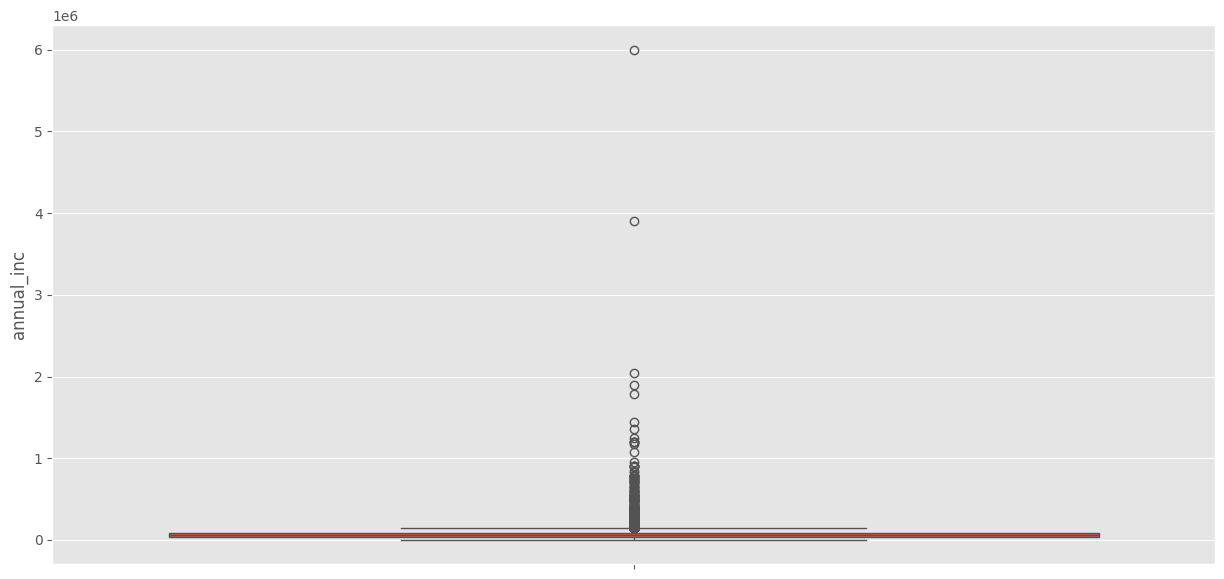

In [34]:
plt.figure(figsize=(15,7))
with plt.style.context('ggplot'):
  sns.boxplot(df.annual_inc)

nhìn hình ta thấy rằng phần phía sau khá xa và không liên tục

In [35]:
quant_info = df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.99])
quant_info

,annual_inc
0.50,58868.0
0.75,82000.0
0.90,115000.0
0.95,140004.0
0.99,234144.0


In [36]:


print('Trước khi xóa :\n')
print(df['annual_inc'].describe(),'\n')

df=df[df["annual_inc"]< df["annual_inc"].quantile(0.95)]

print('Sau khi xóa:\n')
print(df["annual_inc"].describe())

Trước khi xóa :

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64 

Sau khi xóa:

count     36642.000000
mean      60829.831120
std       27717.831464
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       77704.050000
max      140000.000000
Name: annual_inc, dtype: float64


loan_amt

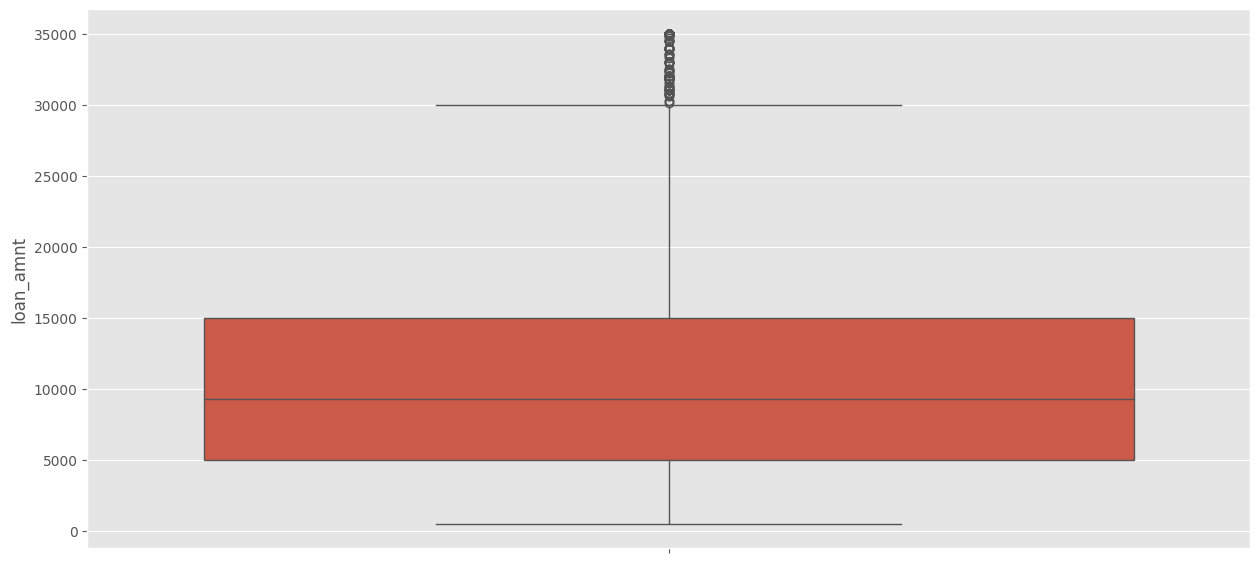

In [37]:
plt.figure(figsize=(15,7))
with plt.style.context('ggplot'):
  sns.boxplot(df.loan_amnt)

nhìn hình ta thấy rằng phần phía sau khá xa và liên tục nên ta không cần xóa

total_pymnt

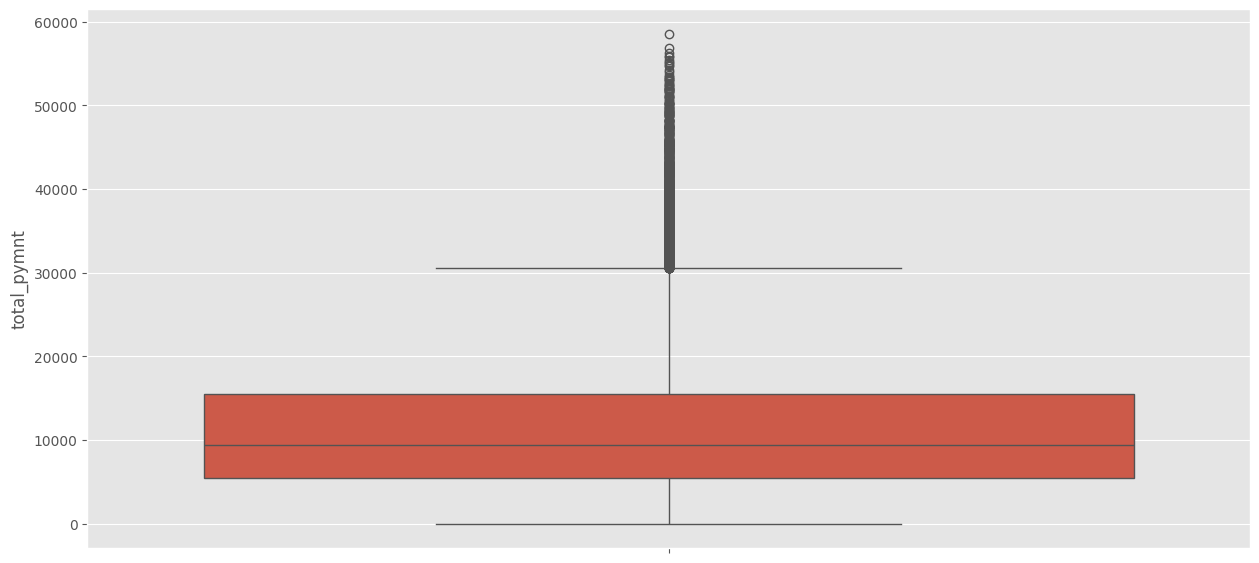

In [38]:
# Drawing Boxplot for Total Payment
plt.figure(figsize=(15,7))
with plt.style.context('ggplot'):
  sns.boxplot(df.total_pymnt)

Tương tự trên nó liên tục ở khoảng xa nên không cần xóa

int_rate

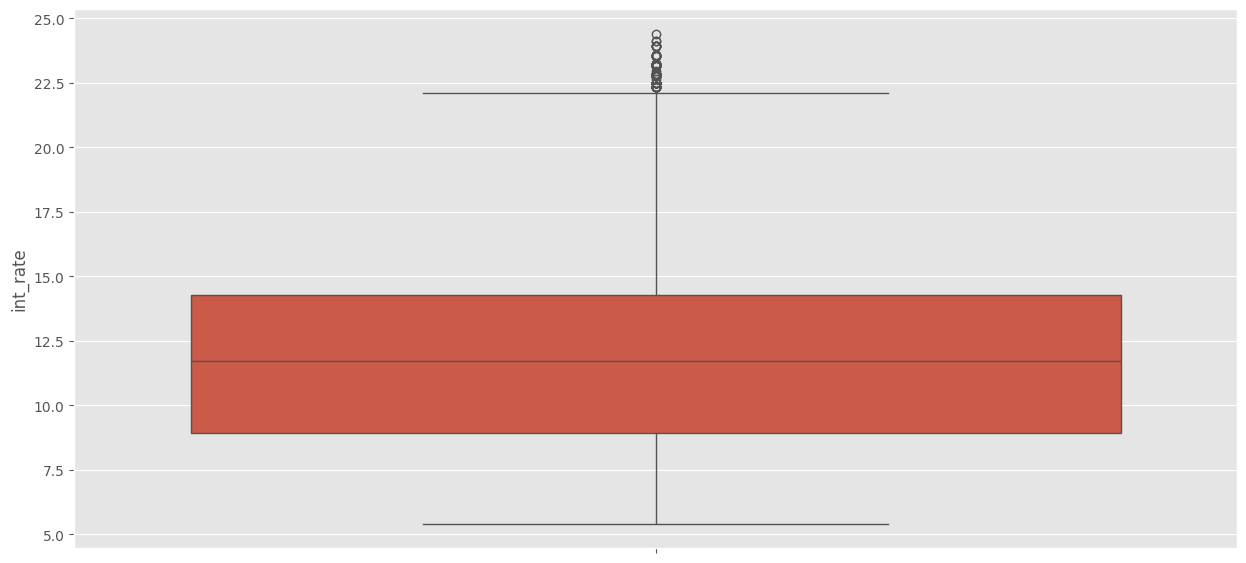

In [39]:
# Drawing Boxplot for Interest Rate
plt.figure(figsize=(15,7))
with plt.style.context('ggplot'):
  sns.boxplot(df.int_rate)

Ta thấy rằng tương tự trên liên tục nên không cần xóa

**Chọn các feature quan trọng**

In [40]:
column_drop_l4=["application_type","policy_code","initial_list_status","installment","pymnt_plan"]
df.drop(labels=column_drop_l4,axis=1,inplace=True)
print(df.shape)
df.isnull().sum()

(36642, 40)


,0
id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
grade,0
sub_grade,0
emp_length,0
home_ownership,0


In [41]:
col_drop_2=['id','pub_rec_bankruptcies','total_rec_int','last_pymnt_amnt','last_pymnt_d','total_pymnt_inv','last_credit_pull_d','total_rec_late_fee','out_prncp','out_prncp_inv','total_pymnt','total_rec_prncp','recoveries','collection_recovery_fee','collection_recovery_fee']
df.drop(labels=col_drop_2,axis=1,inplace=True)

**Tạo các khoảng chạy trong khoảng bao nhiêu để dễ dàng thống kê hơn**

In [42]:
df['annual_inc_categories'] = pd.cut( df['annual_inc'],
                                      bins = [0 , 20000, 40000, 60000, 80000, 1500000],
                                      labels = ['0-20000','20000-40000','40000-60000','60000-80000','80000+'])

df['loan_amnt_categories'] = pd.cut(df['loan_amnt'],
                                    bins = [0,7000,14000,21000,28000,3500000],
                                    labels = ['0-7000','7000-14000','14000-21000','21000-28000','28000+'])

df['interest_rate_categories'] = pd.cut(df['int_rate'],
                                        bins = [0,10,12.5,16,20],
                                        labels=['0-10','10-13','12.5-16','16+'])

df['dti_categories'] = pd.cut(df['dti'],
                              bins = [0,5,10,15,20,25],
                              labels=['0-5','5-10','10-15','15-20','25+'])

In [43]:
df.shape
print(df.head(5))

   loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate grade  \
0       5000         5000           4975.0   36 months     10.65     B   
1       2500         2500           2500.0   60 months     15.27     C   
2       2400         2400           2400.0   36 months     15.96     C   
3      10000        10000          10000.0   36 months     13.49     C   
5       5000         5000           5000.0   36 months      7.90     A   

  sub_grade  emp_length home_ownership  annual_inc  ... open_acc pub_rec  \
0        B2          10           RENT     24000.0  ...        3       0   
1        C4           1           RENT     30000.0  ...        3       0   
2        C5          10           RENT     12252.0  ...        2       0   
3        C1          10           RENT     49200.0  ...       10       0   
5        A4           3           RENT     36000.0  ...        9       0   

  revol_bal revol_util total_acc collections_12_mths_ex_med  \
0     13648      83.70         9   

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36642 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   loan_amnt                   36642 non-null  int64   
 1   funded_amnt                 36642 non-null  int64   
 2   funded_amnt_inv             36642 non-null  float64 
 3   term                        36642 non-null  object  
 4   int_rate                    36642 non-null  float64 
 5   grade                       36642 non-null  object  
 6   sub_grade                   36642 non-null  object  
 7   emp_length                  36642 non-null  int64   
 8   home_ownership              36642 non-null  object  
 9   annual_inc                  36642 non-null  float64 
 10  verification_status         36642 non-null  object  
 11  issue_d                     36642 non-null  object  
 12  loan_status                 36642 non-null  object  
 13  purpose              

**PHÂN TÍCH 1 BIẾN**

Hàm vẽ biểu đồ trang thái phân bố giữa các ban với nhau về Fully Paid và Charge Off Và Biểu đồ phần trăm phân bố tỉ lệ của biến Charge Off

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_loan_status_by_state(state_col, status_col):
    # Khởi tạo figure với 2 biểu đồ ngang hàng nhau
    fig, axes = plt.subplots(ncols=2, figsize=(20, 6))

    # Biểu đồ 1: Loan Status by State in US
    sns.despine()
    order = state_col.value_counts().index  # Sắp xếp theo số lượng lớn nhất
    sns.countplot(x=state_col, hue=status_col, order=order, ax=axes[0])
    axes[0].tick_params(axis='x', labelrotation=45)
    axes[0].set(xlabel='State', ylabel='Count')
    axes[0].set_title('Loan Status ', size=15)

    # Biểu đồ 2: Tỷ lệ % charged off của từng bang
    charged_off_counts = state_col[status_col == 'Charged Off'].value_counts()
    total_counts = state_col.value_counts()
    charged_off_ratio = (charged_off_counts / total_counts * 100).fillna(0).sort_values(ascending=False)

    # Vẽ biểu đồ thanh
    sns.barplot(x=charged_off_ratio.index, y=charged_off_ratio.values, ax=axes[1], palette="viridis", order=order)
    axes[1].set(xlabel='State', ylabel='% Charged Off')
    axes[1].set_title('Percentage of Charged Off ', size=15)
    axes[1].tick_params(axis='x', labelrotation=45)
    sns.despine(ax=axes[1])

    plt.tight_layout()  # Đảm bảo các biểu đồ không chồng lên nhau
    plt.show()


Phân tích Loan_status theo addr_state

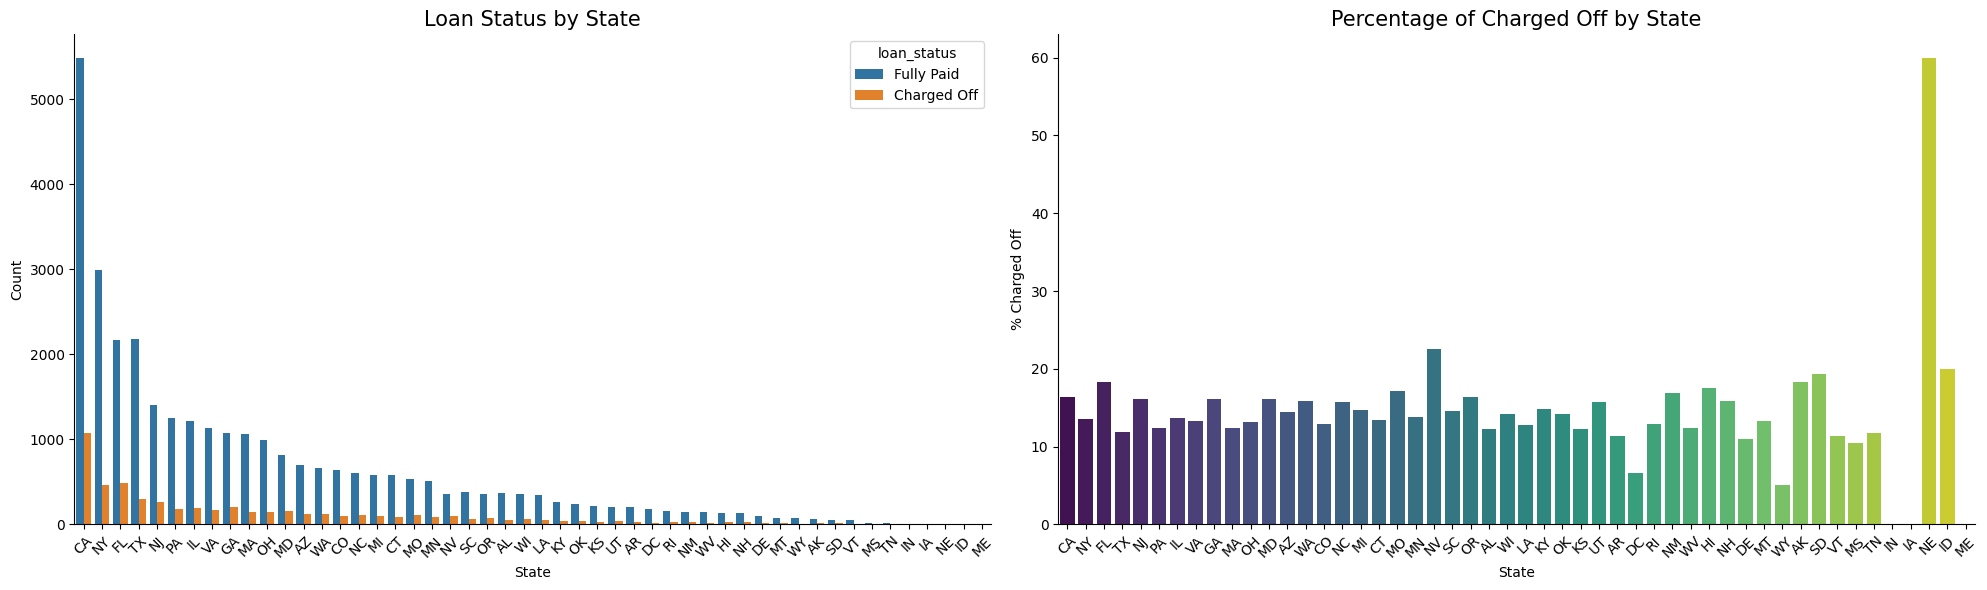

In [46]:
plot_loan_status_by_state(df['addr_state'],df['loan_status'])

Region

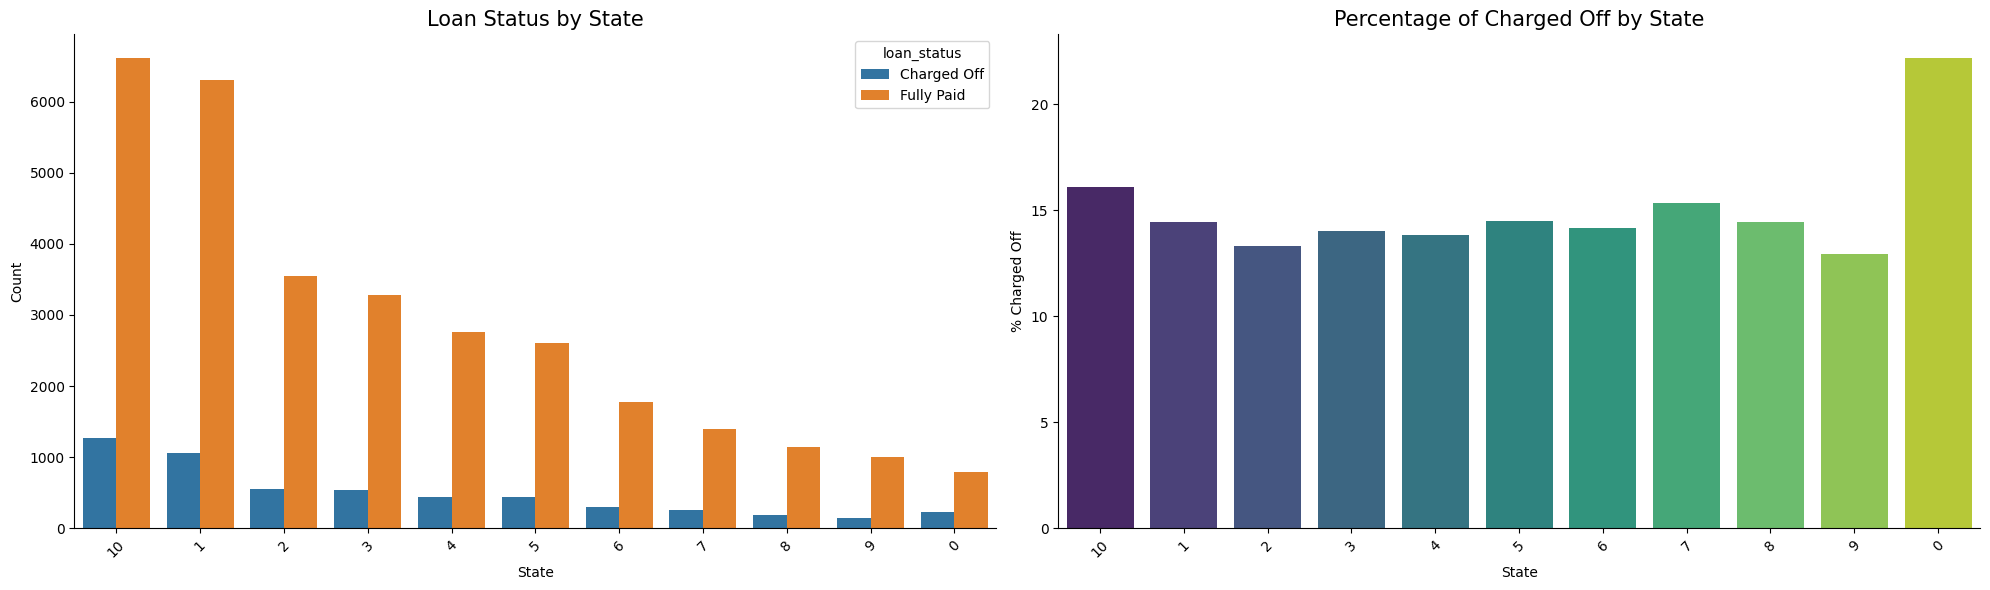

In [49]:
plot_loan_status_by_state(df['emp_length'],df['loan_status'])

Grade

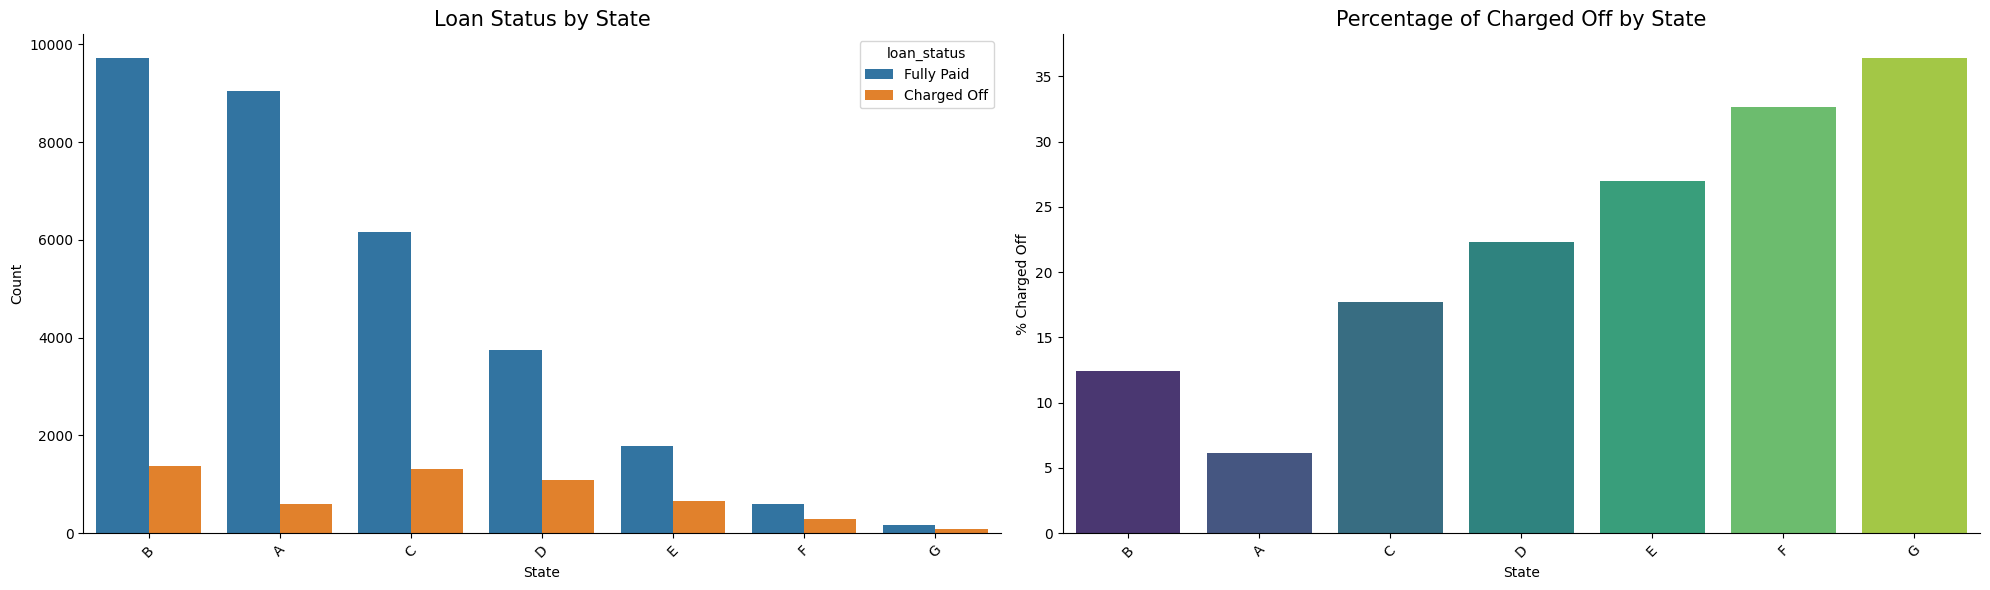

In [50]:
plot_loan_status_by_state(df['grade'],df['loan_status'])

Sub grade

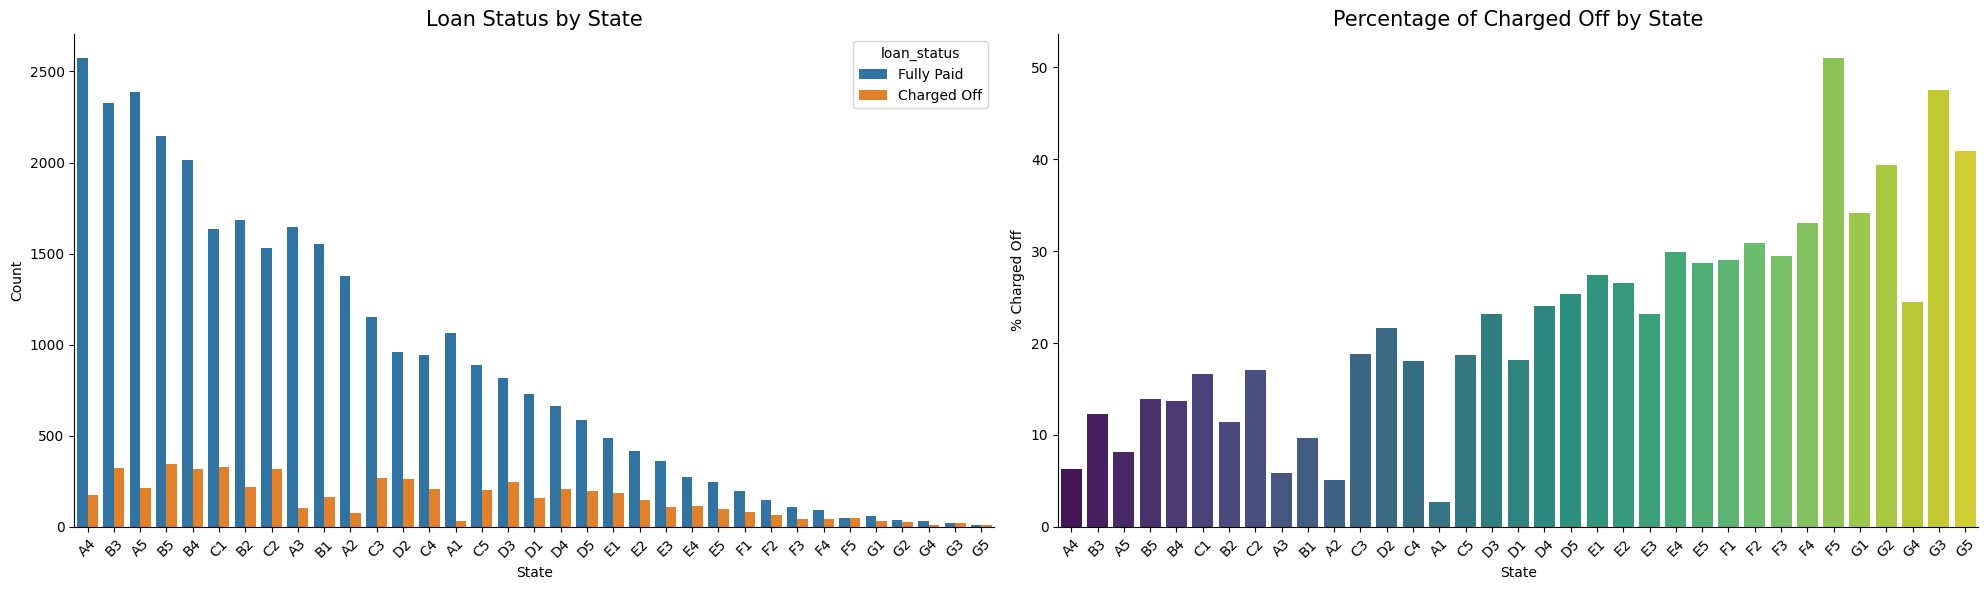

In [51]:
plot_loan_status_by_state(df['sub_grade'],df['loan_status'])

Term

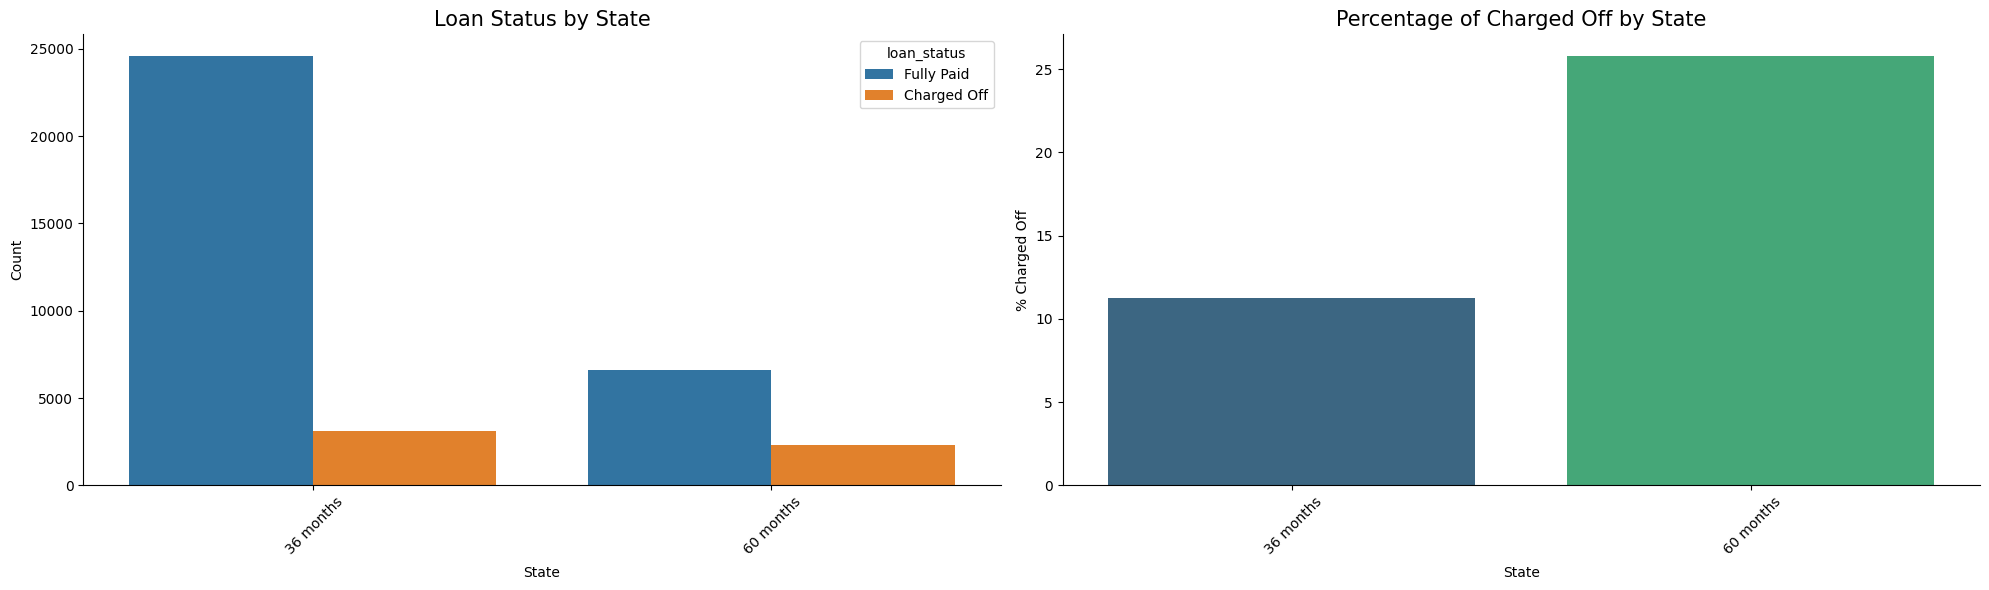

In [52]:
plot_loan_status_by_state(df['term'],df['loan_status'])

purpose

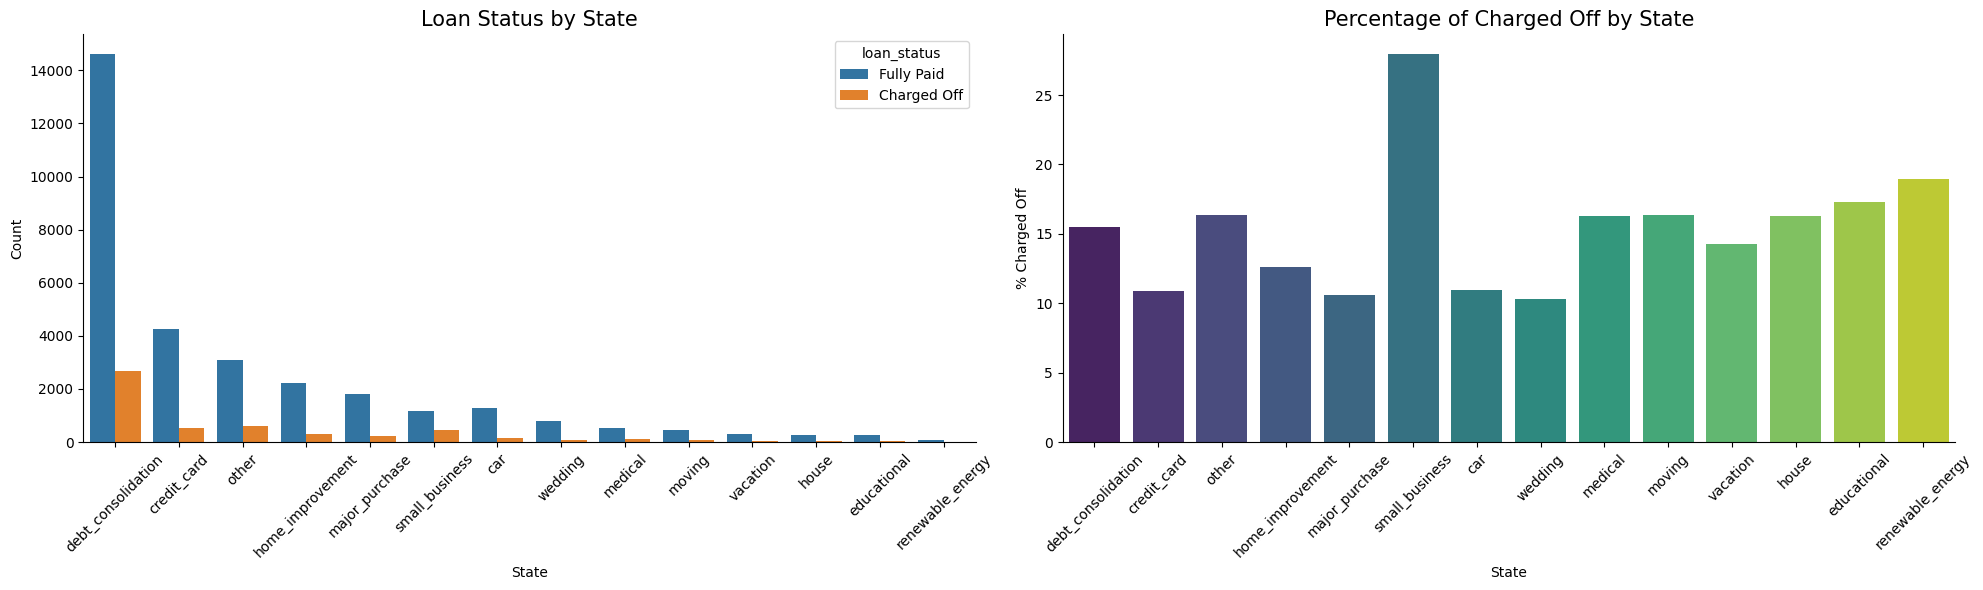

In [53]:
plot_loan_status_by_state(df['purpose'],df['loan_status'])

home_ownership

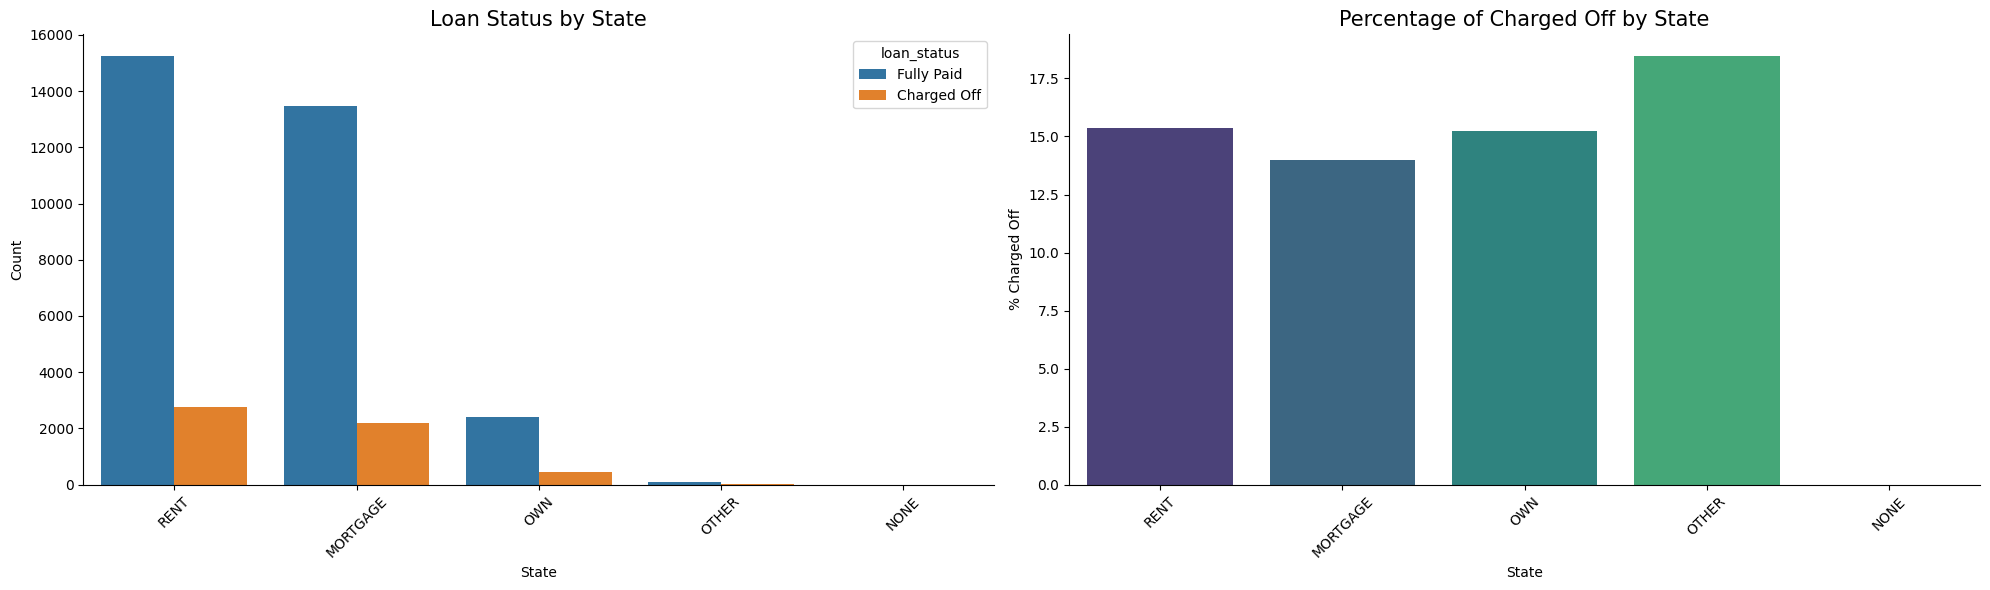

In [54]:
plot_loan_status_by_state(df['home_ownership'],df['loan_status'])

verification_status

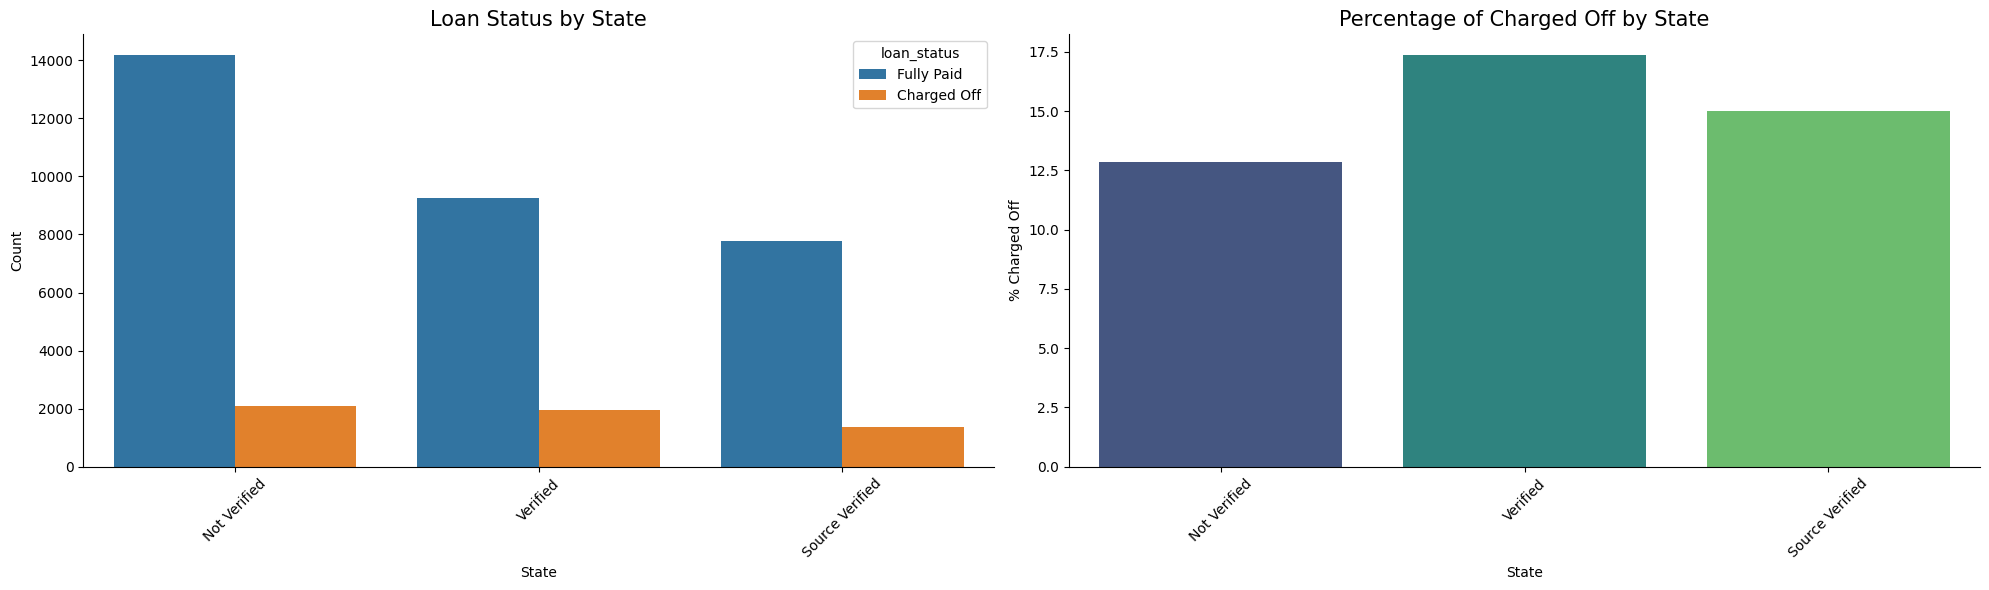

In [55]:
plot_loan_status_by_state(df['verification_status'],df['loan_status'])

**Tách cột tháng năm ra**

In [56]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['issue_year'] = df['issue_d'].dt.year
df['issue_month'] = df['issue_d'].dt.month

Theo Tháng

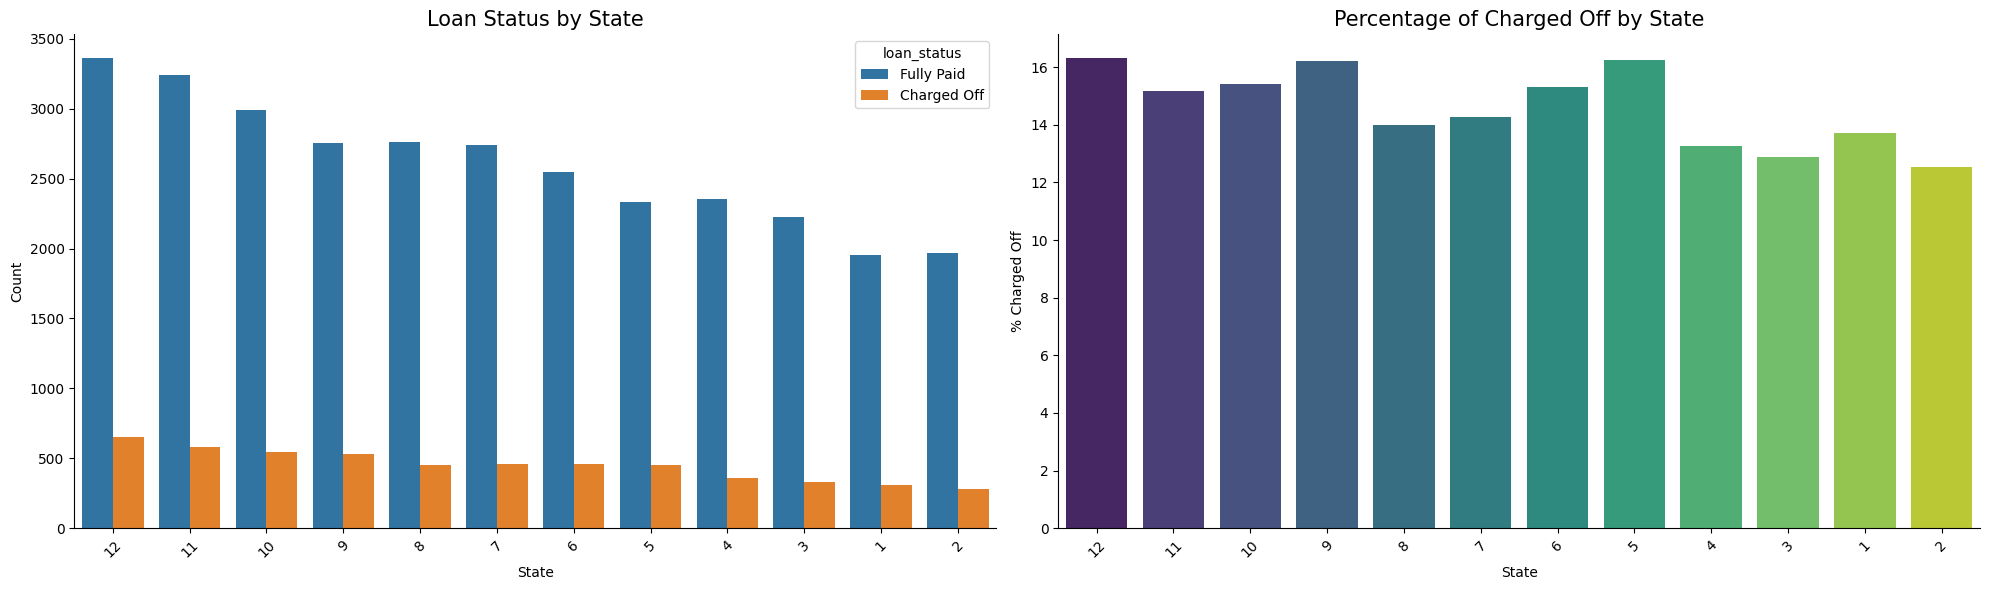

In [57]:
plot_loan_status_by_state(df['issue_month'],df['loan_status'])

Theo năm

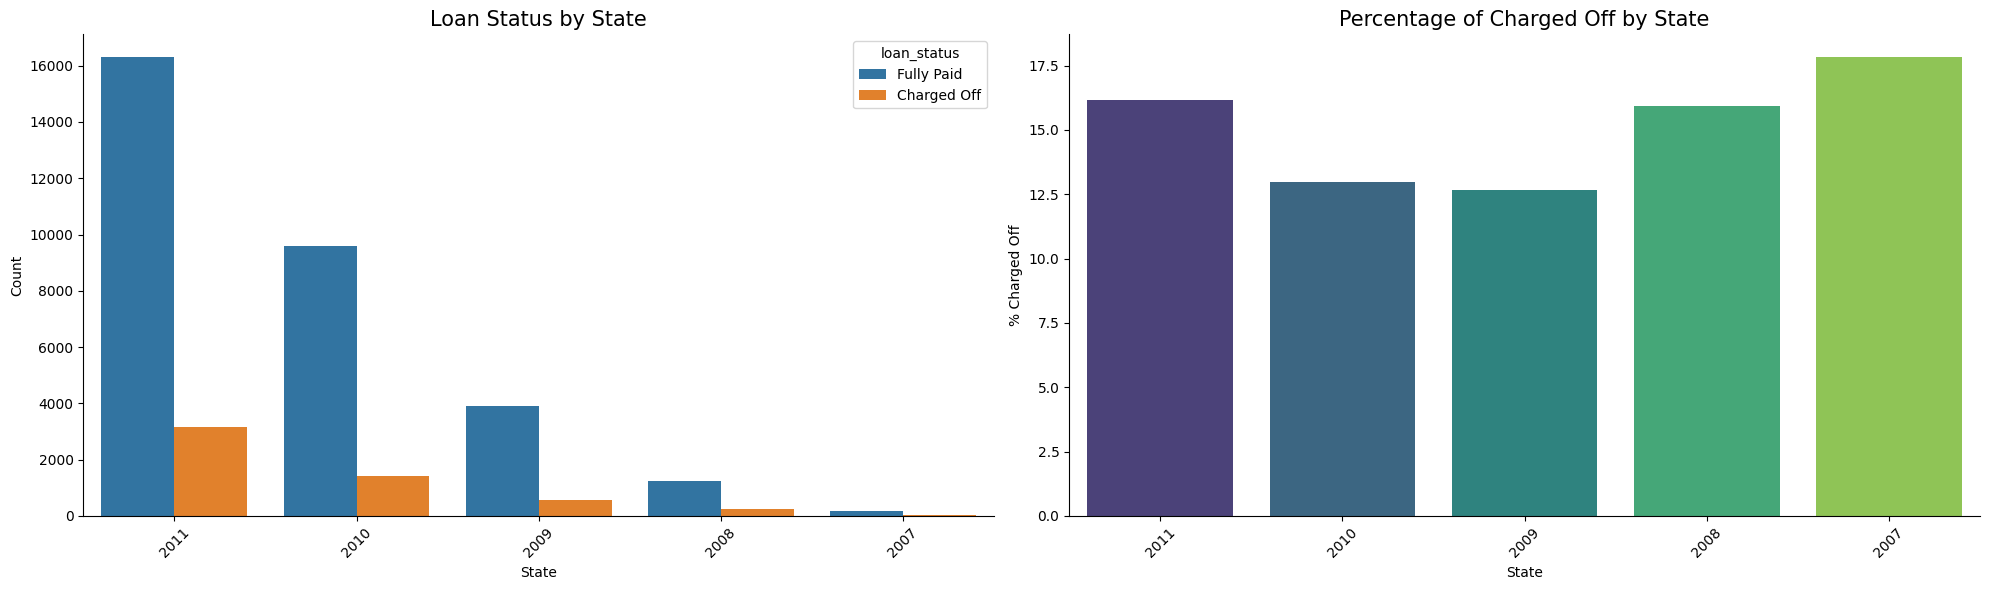

In [58]:
plot_loan_status_by_state(df['issue_year'],df['loan_status'])

delinq_2yrs

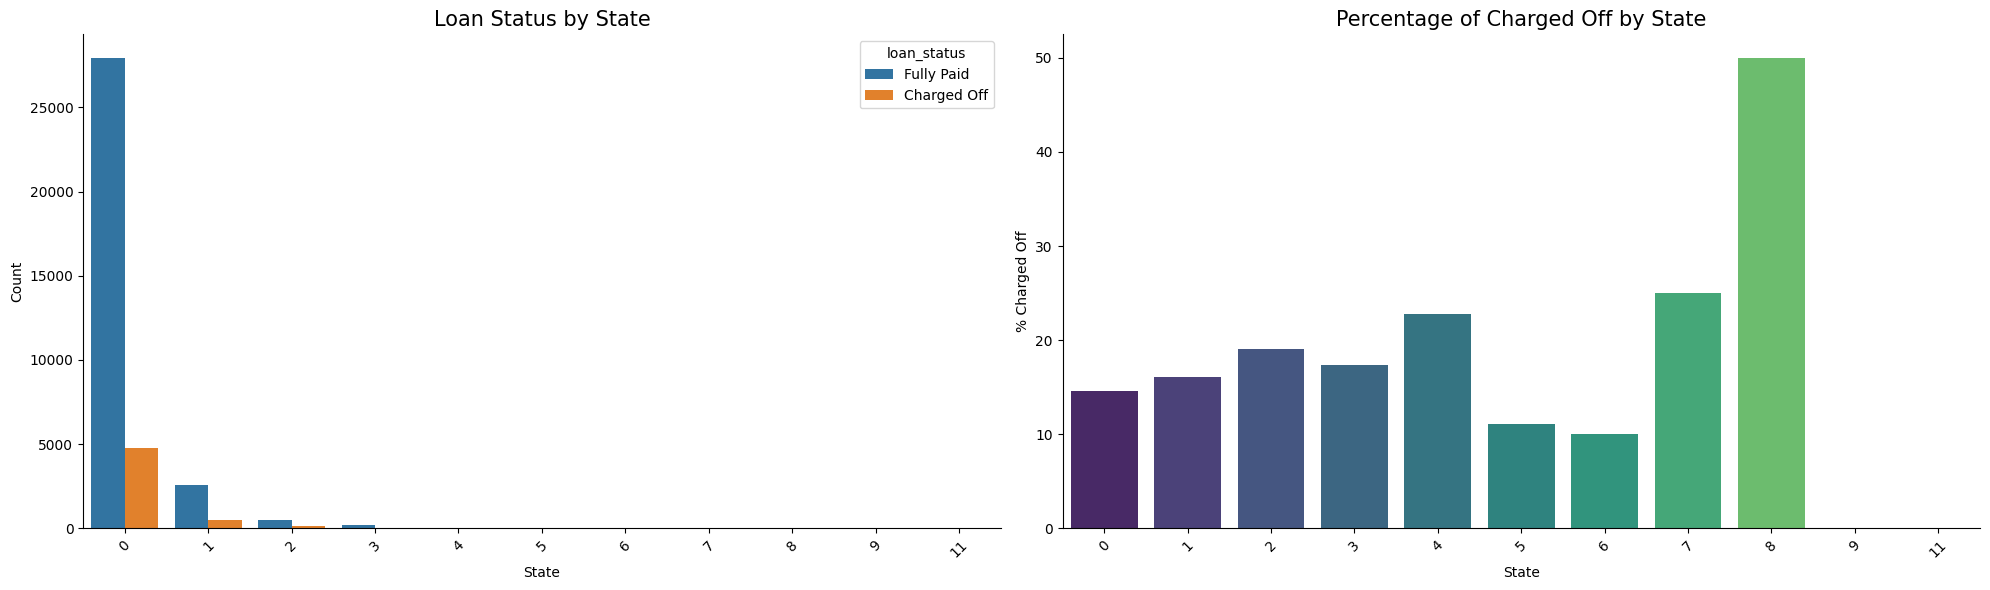

In [59]:
plot_loan_status_by_state(df['delinq_2yrs'],df['loan_status'])

inq_last_6mths

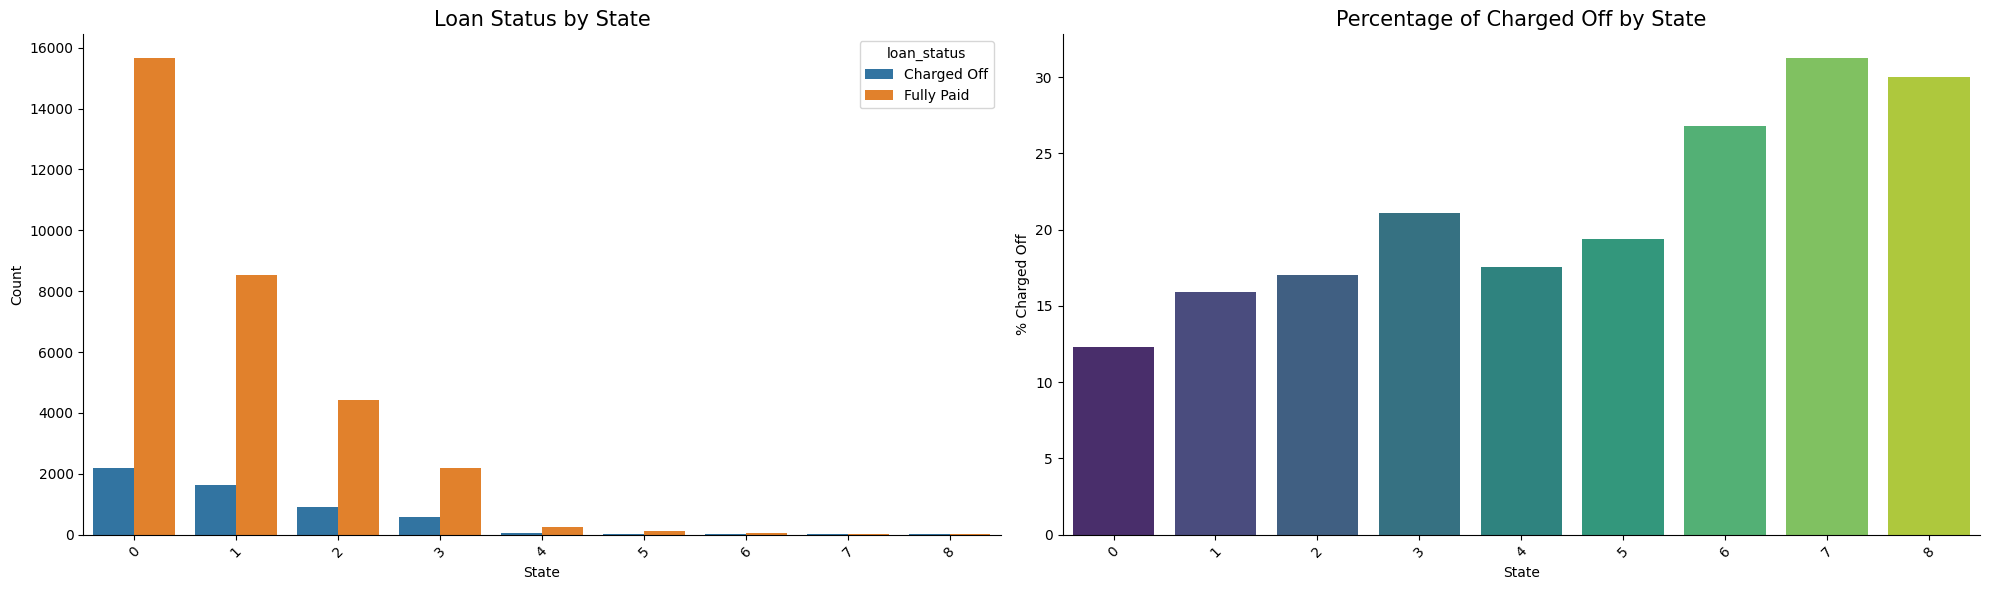

In [60]:
plot_loan_status_by_state(df['inq_last_6mths'],df['loan_status'])

pub_rec

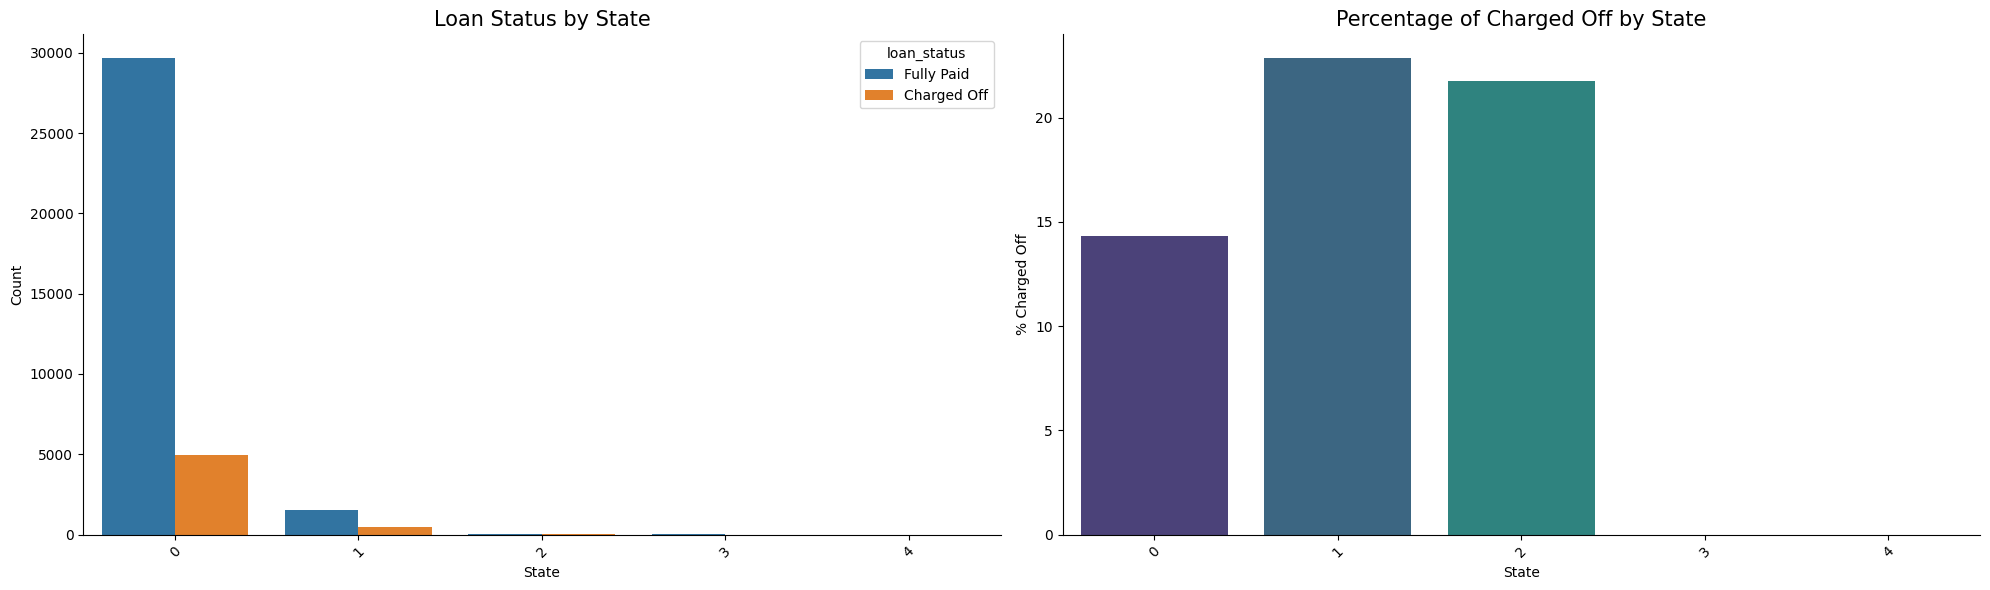

In [61]:
plot_loan_status_by_state(df['pub_rec'],df['loan_status'])

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36642 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   loan_amnt                   36642 non-null  int64         
 1   funded_amnt                 36642 non-null  int64         
 2   funded_amnt_inv             36642 non-null  float64       
 3   term                        36642 non-null  object        
 4   int_rate                    36642 non-null  float64       
 5   grade                       36642 non-null  object        
 6   sub_grade                   36642 non-null  object        
 7   emp_length                  36642 non-null  int64         
 8   home_ownership              36642 non-null  object        
 9   annual_inc                  36642 non-null  float64       
 10  verification_status         36642 non-null  object        
 11  issue_d                     36642 non-null  datetime64[ns]


In [67]:
def plot_column_distribution(df, column_name):
    """
    Hàm vẽ biểu đồ phân bố (histogram + KDE) của một cột trong DataFrame.

    Tham số:
    - df: DataFrame chứa dữ liệu.
    - column_name: Tên cột muốn vẽ.
    """
    sns.set_style("dark")
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column_name], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

In [68]:
numerical_columns = [
    "loan_amnt", "funded_amnt", "funded_amnt_inv", "int_rate", "emp_length",
    "annual_inc", "dti", "delinq_2yrs", "inq_last_6mths", "open_acc",
    "pub_rec", "revol_bal", "total_acc", "collections_12_mths_ex_med"
]


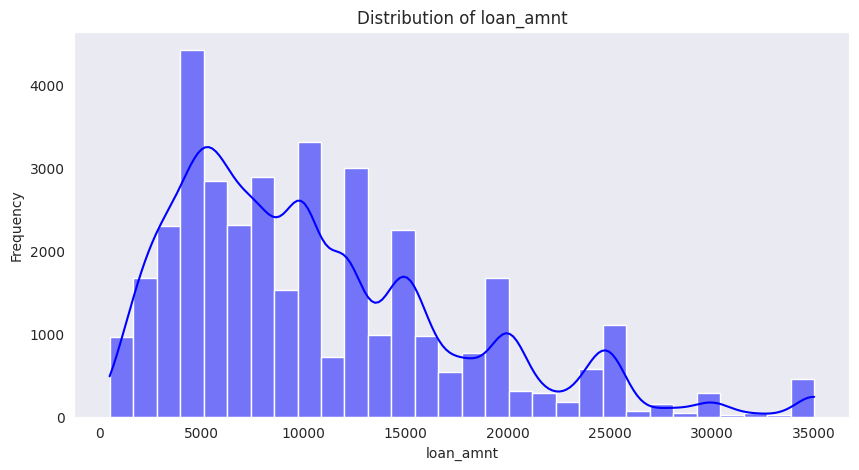

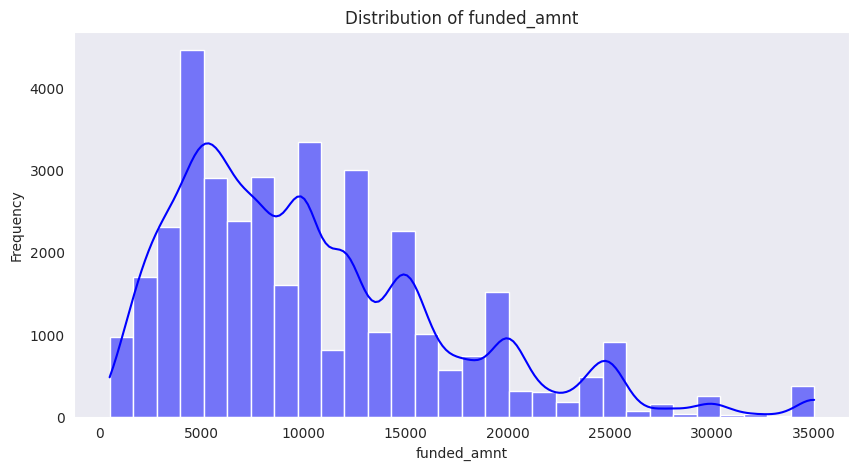

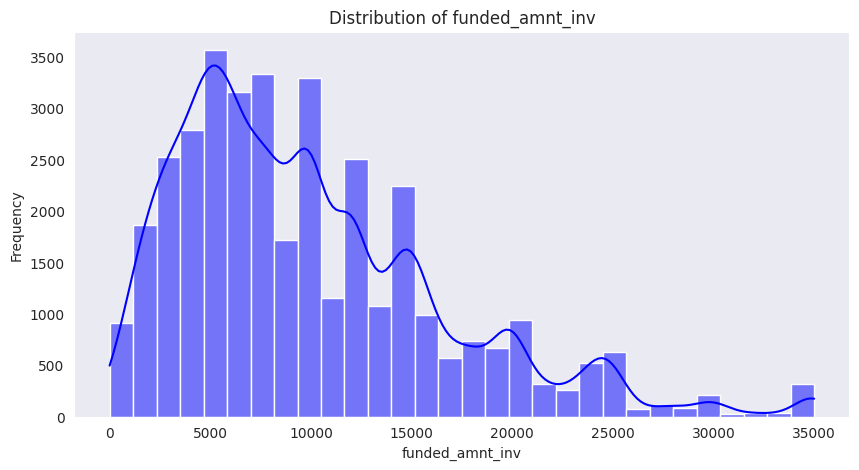

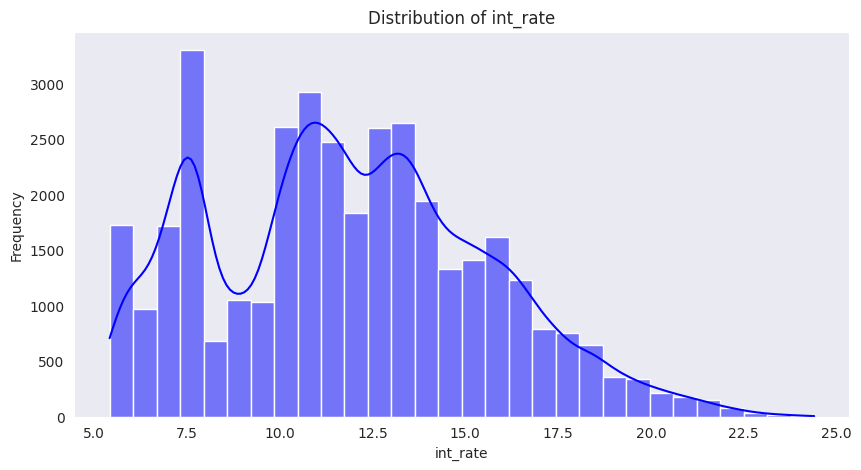

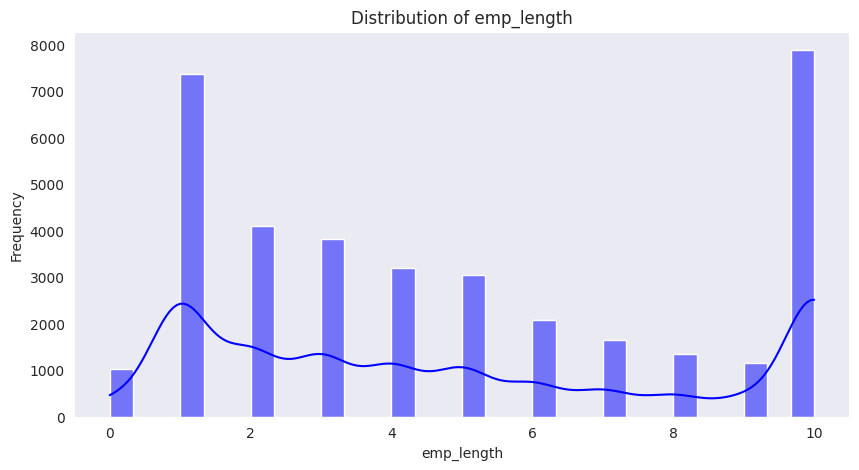

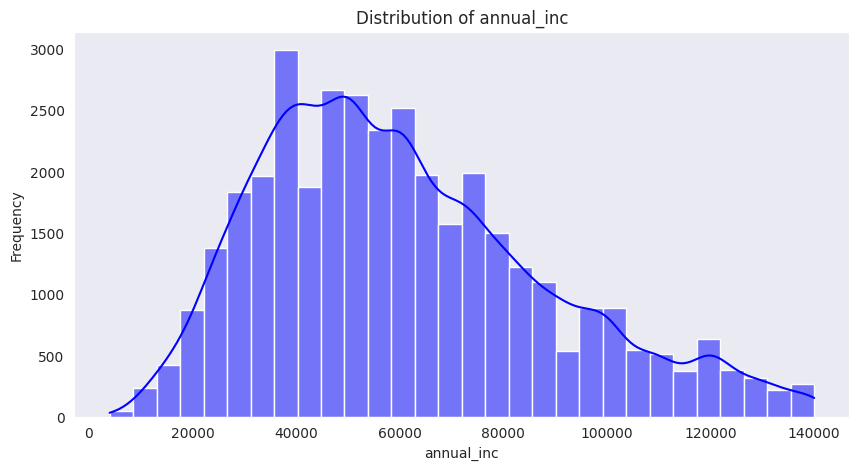

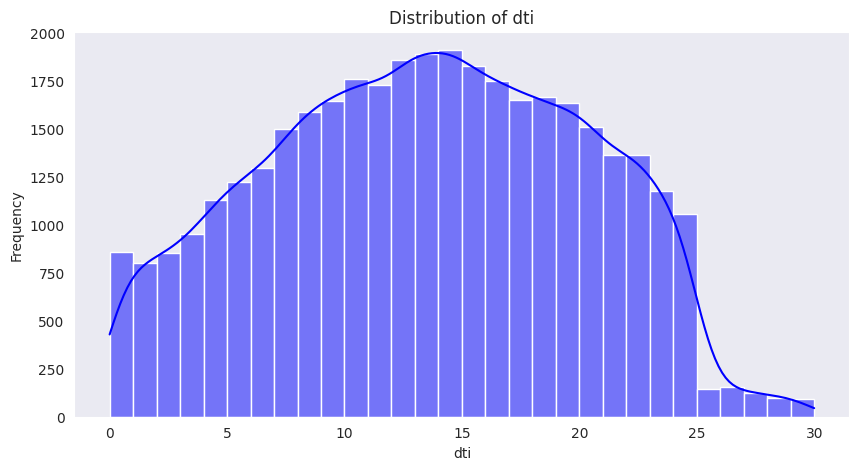

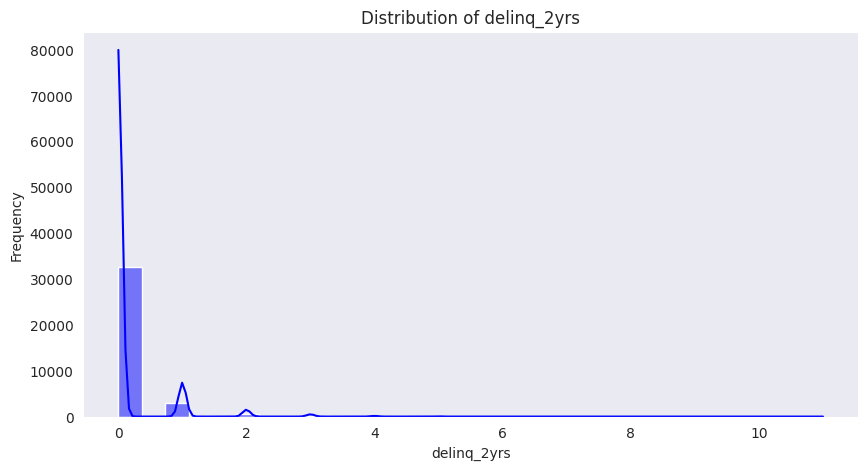

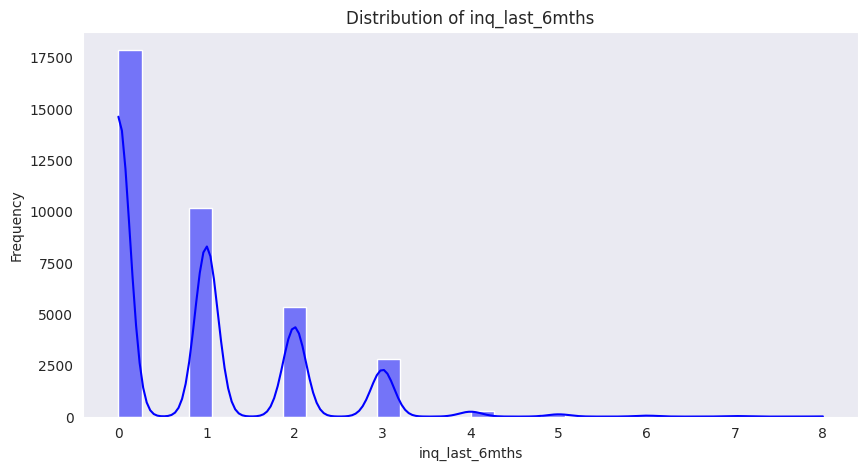

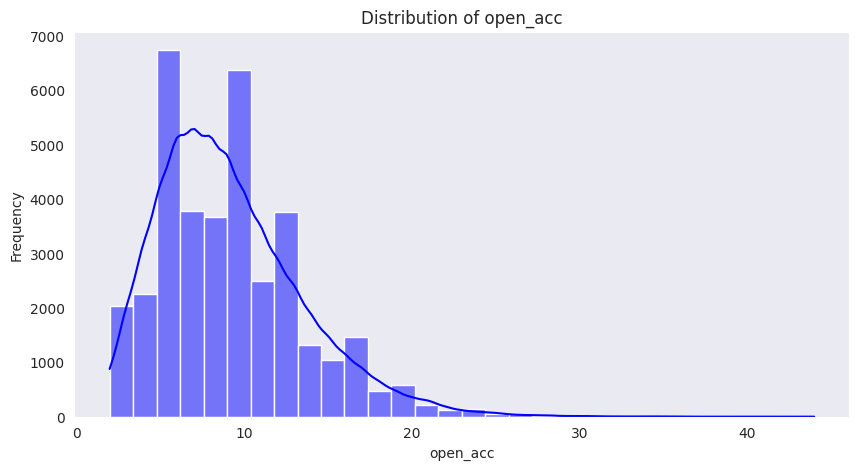

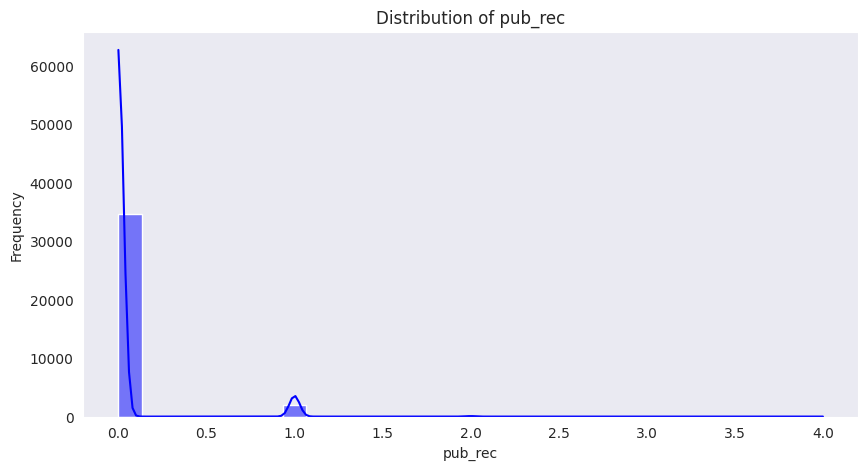

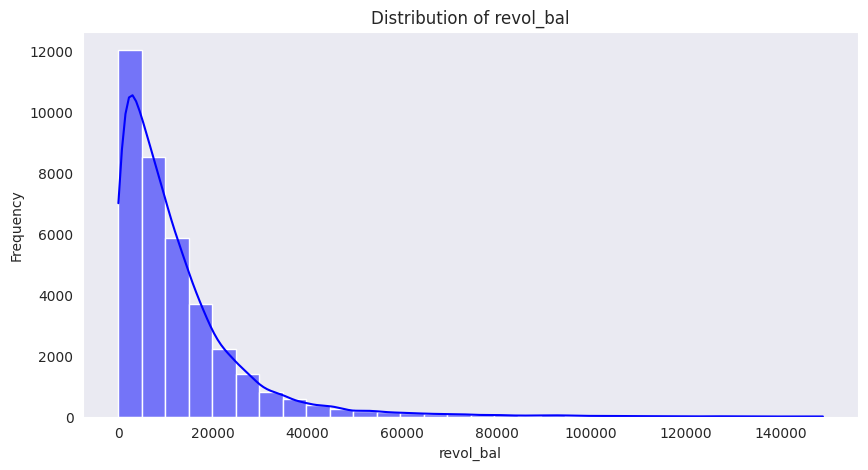

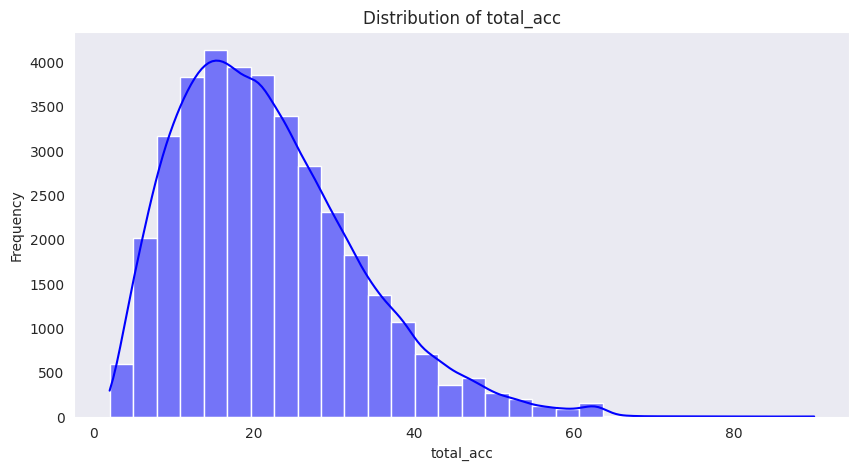

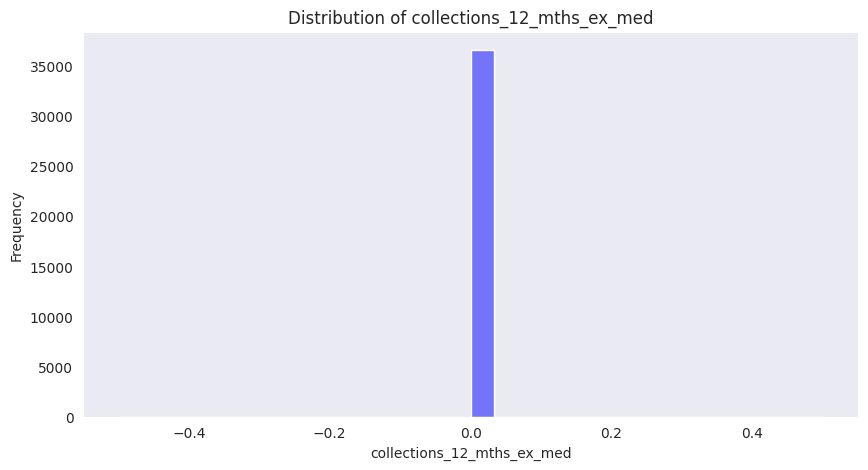

In [69]:
for i in numerical_columns:
    plot_column_distribution(df, i)

Kiểm tra các giá trị null còn lại

In [70]:
df.isnull().sum()

,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
grade,0
sub_grade,0
emp_length,0
home_ownership,0
annual_inc,0


In [71]:
df = df.dropna()

In [72]:
df.isnull().sum()

,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
grade,0
sub_grade,0
emp_length,0
home_ownership,0
annual_inc,0


**PHÂN TÍCH 2 BIẾN**

In [74]:
loan_correlation=df.corr(numeric_only=True)
loan_correlation

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,issue_year,issue_month
loan_amnt,1.000000,0.981823,0.935026,0.251124,0.151339,0.395453,0.076253,-0.050679,-0.003515,0.162986,-0.047666,0.307342,0.235597,NaN,0.086567,0.038989
funded_amnt,0.981823,1.000000,0.953264,0.257409,0.150731,0.391750,0.075597,-0.050401,-0.002747,0.161253,-0.047709,0.299200,0.230833,NaN,0.098755,0.028324
funded_amnt_inv,0.935026,0.953264,1.000000,0.249033,0.159448,0.374657,0.081376,-0.056380,-0.018451,0.146995,-0.049100,0.278660,0.222716,NaN,0.236739,0.055412
int_rate,0.251124,0.257409,0.249033,1.000000,0.003989,0.030127,0.140649,0.146717,0.133790,-0.017927,0.103935,0.076253,-0.074067,NaN,0.011601,0.009014
emp_length,0.151339,0.150731,0.159448,0.003989,1.000000,0.213041,0.047188,0.013531,0.009222,0.098077,0.054989,0.157760,0.204984,NaN,0.089609,0.019231
annual_inc,0.395453,0.391750,0.374657,0.030127,0.213041,1.000000,-0.077335,0.023880,0.028991,0.265386,-0.011016,0.397828,0.387853,NaN,0.036368,0.008896
dti,0.076253,0.075597,0.081376,0.140649,0.047188,-0.077335,1.000000,-0.022167,0.009101,0.289531,-0.000170,0.263534,0.230288,NaN,0.059839,0.014371
delinq_2yrs,-0.050679,-0.050401,-0.056380,0.146717,0.013531,0.023880,-0.022167,1.000000,0.008540,0.017464,0.008018,-0.062054,0.068077,NaN,-0.003923,-0.012228
inq_last_6mths,-0.003515,-0.002747,-0.018451,0.133790,0.009222,0.028991,0.009101,0.008540,1.000000,0.089090,0.025108,-0.026643,0.107160,NaN,-0.065088,0.011714
open_acc,0.162986,0.161253,0.146995,-0.017927,0.098077,0.265386,0.289531,0.017464,0.089090,1.000000,0.004181,0.283704,0.680897,NaN,-0.001748,-0.002502


In [75]:
df = df.drop(['collections_12_mths_ex_med'], axis=1)

In [76]:
loan_correlation=df.corr(numeric_only=True)
loan_correlation

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,issue_year,issue_month
loan_amnt,1.000000,0.981823,0.935026,0.251124,0.151339,0.395453,0.076253,-0.050679,-0.003515,0.162986,-0.047666,0.307342,0.235597,0.086567,0.038989
funded_amnt,0.981823,1.000000,0.953264,0.257409,0.150731,0.391750,0.075597,-0.050401,-0.002747,0.161253,-0.047709,0.299200,0.230833,0.098755,0.028324
funded_amnt_inv,0.935026,0.953264,1.000000,0.249033,0.159448,0.374657,0.081376,-0.056380,-0.018451,0.146995,-0.049100,0.278660,0.222716,0.236739,0.055412
int_rate,0.251124,0.257409,0.249033,1.000000,0.003989,0.030127,0.140649,0.146717,0.133790,-0.017927,0.103935,0.076253,-0.074067,0.011601,0.009014
emp_length,0.151339,0.150731,0.159448,0.003989,1.000000,0.213041,0.047188,0.013531,0.009222,0.098077,0.054989,0.157760,0.204984,0.089609,0.019231
annual_inc,0.395453,0.391750,0.374657,0.030127,0.213041,1.000000,-0.077335,0.023880,0.028991,0.265386,-0.011016,0.397828,0.387853,0.036368,0.008896
dti,0.076253,0.075597,0.081376,0.140649,0.047188,-0.077335,1.000000,-0.022167,0.009101,0.289531,-0.000170,0.263534,0.230288,0.059839,0.014371
delinq_2yrs,-0.050679,-0.050401,-0.056380,0.146717,0.013531,0.023880,-0.022167,1.000000,0.008540,0.017464,0.008018,-0.062054,0.068077,-0.003923,-0.012228
inq_last_6mths,-0.003515,-0.002747,-0.018451,0.133790,0.009222,0.028991,0.009101,0.008540,1.000000,0.089090,0.025108,-0.026643,0.107160,-0.065088,0.011714
open_acc,0.162986,0.161253,0.146995,-0.017927,0.098077,0.265386,0.289531,0.017464,0.089090,1.000000,0.004181,0.283704,0.680897,-0.001748,-0.002502


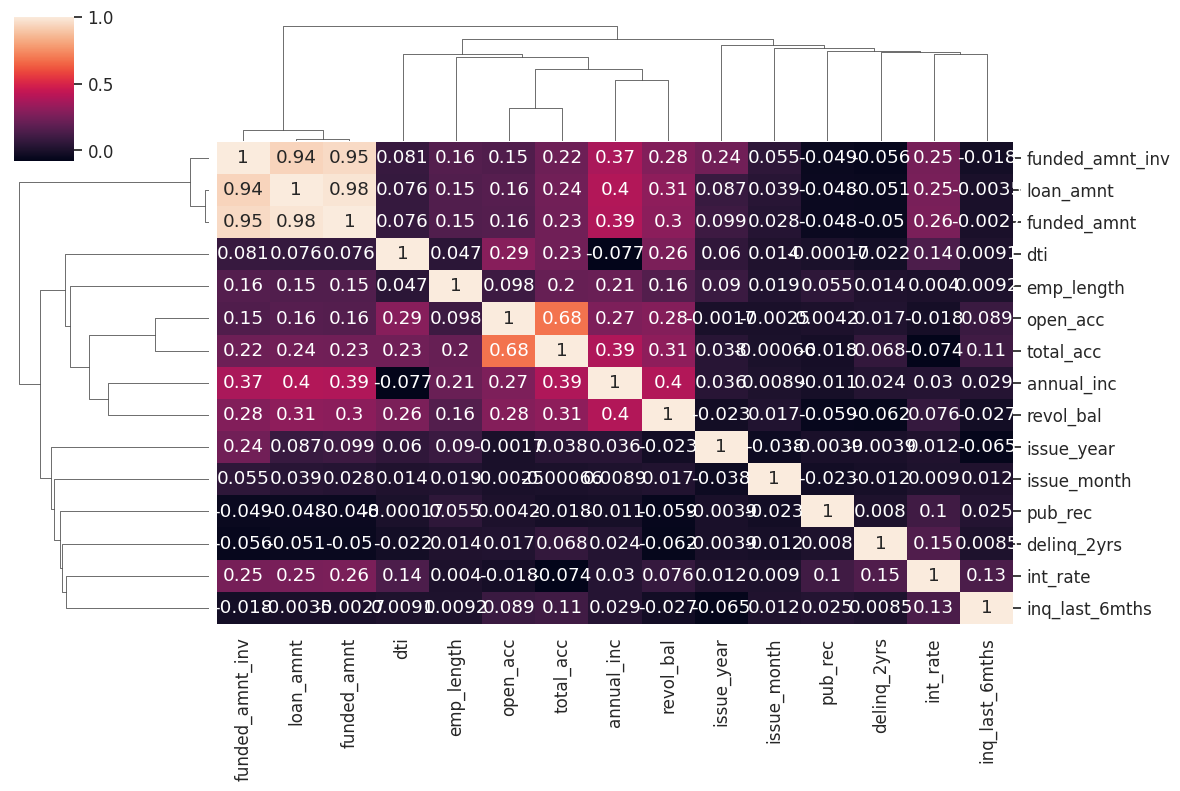

In [77]:
sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(12,8))
plt.show()

PHÂN TÍCH BIẾN  annual income với Charged Off Loans

In [78]:
inc_range_vs_loan = df.groupby(['annual_inc_categories', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Fully Paid']
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_categories,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,218,895,1113,0.195867
1,20000-40000,1429,6755,8184,0.174609
2,40000-60000,1617,9215,10832,0.149280
3,60000-80000,933,6337,7270,0.128336
4,80000+,817,6876,7693,0.106200


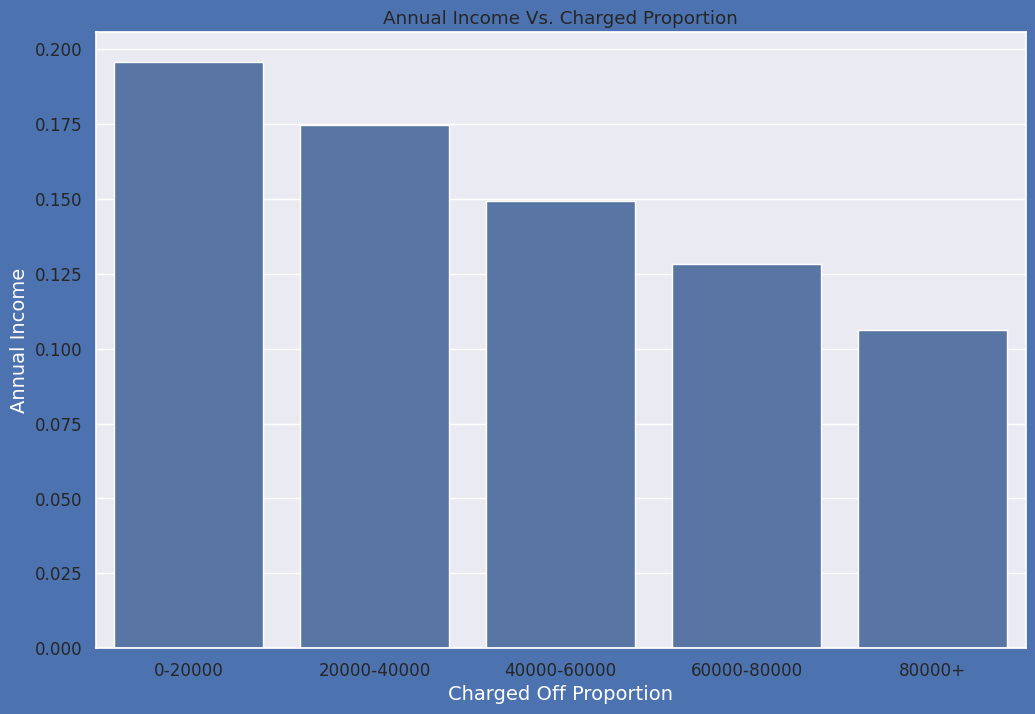

In [80]:
fig,ax1=plt.subplots(figsize=(12,8),facecolor='b')
ax1.set(title='Annual Income Vs. Charged Proportion')
ax1=sns.barplot(x='annual_inc_categories',y='Chargedoff_Proportion',data=inc_range_vs_loan)
ax1.set_xlabel('Charged Off Proportion',fontsize=14,color='w') # Changed ax to ax1
ax1.set_ylabel('Annual Income',fontsize=14,color='w')
plt.show()

purpose với loan_status

In [81]:
purpose_vs_loan = df.groupby(['purpose','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total']=purpose_vs_loan['Charged Off']+purpose_vs_loan['Fully Paid']
purpose_vs_loan['ChargedOff_Proportion']=purpose_vs_loan['Charged Off']/purpose_vs_loan['Total']
purpose_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,ChargedOff_Proportion
11,small_business,408,1106,1514,0.269485
3,educational,51,245,296,0.172297
10,renewable_energy,15,75,90,0.166667
8,moving,87,443,530,0.164151
9,other,576,2991,3567,0.161480
5,house,50,269,319,0.156740
7,medical,97,529,626,0.154952
2,debt_consolidation,2445,14052,16497,0.148209
12,vacation,49,303,352,0.139205
4,home_improvement,303,2146,2449,0.123724


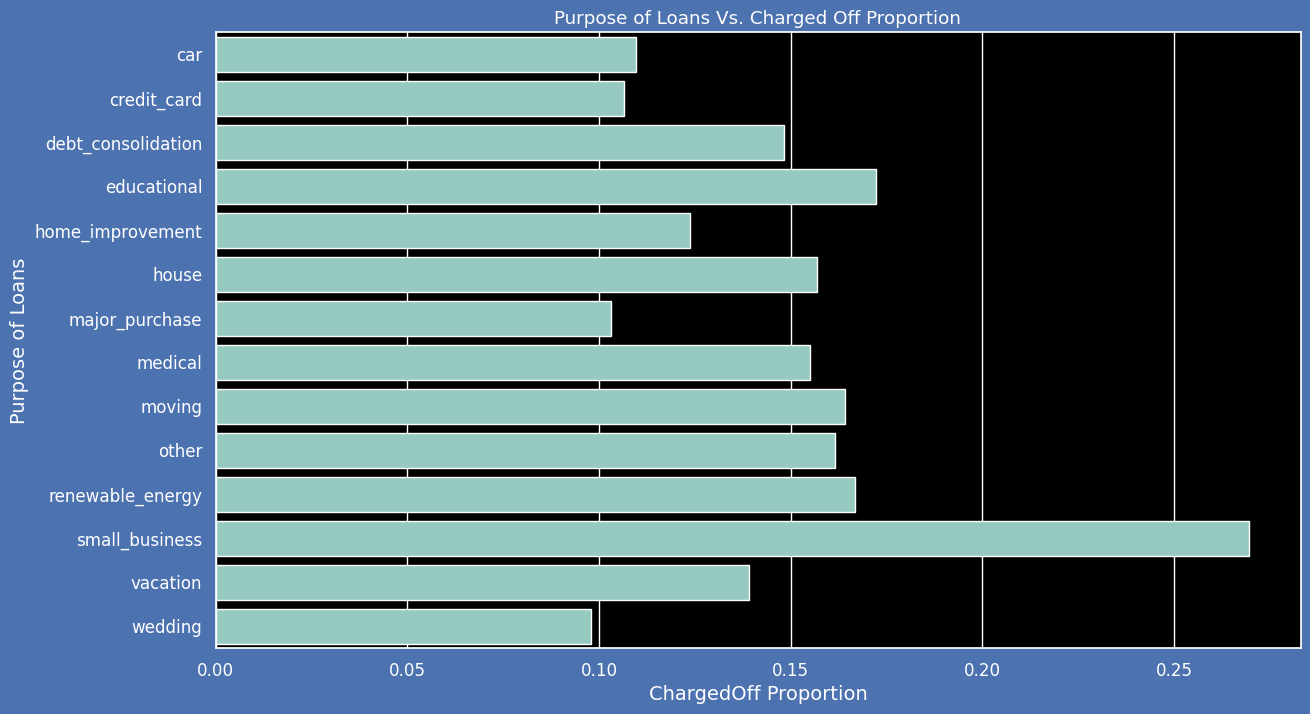

In [82]:

with plt.style.context('dark_background'):
  fig,ax1=plt.subplots(figsize=(14,8),facecolor='b')
  ax1.set(title='Purpose of Loans Vs. Charged Off Proportion')
  ax1=sns.barplot(y='purpose',x='ChargedOff_Proportion',data=purpose_vs_loan)
  ax1.set_ylabel('Purpose of Loans',fontsize=14,color='w')
  ax1.set_xlabel('ChargedOff Proportion',fontsize=14,color='w')

In [83]:
def calculate_charged_off_proportion(df, state_column='addr_state', status_column='loan_status'):
    state_vs_loan = df.groupby([state_column, status_column])[status_column].count().unstack().fillna(0).reset_index()
    state_vs_loan['Total'] = state_vs_loan.get('Charged Off', 0) + state_vs_loan.get('Fully Paid', 0)
    state_vs_loan['ChargedOff_Proportion'] = state_vs_loan.get('Charged Off', 0) / state_vs_loan['Total']
    return state_vs_loan.sort_values('ChargedOff_Proportion', ascending=False)


In [85]:
def plot_charged_off_proportion(df, x_column, title='Charged Off Proportion by Category'):
    with plt.style.context('dark_background'):
        fig, ax = plt.subplots(figsize=(14, 8), facecolor='b')
        ax.set(title=title)
        sns.barplot(x=x_column, y='ChargedOff_Proportion', data=df, ax=ax)
        ax.set_xlabel(x_column.capitalize(), fontsize=14, color='w')
        ax.set_ylabel('Charged Off Proportion', fontsize=14, color='w')
        plt.show()


grade với charge off

In [84]:
calculate_charged_off_proportion(df, state_column='grade', status_column='loan_status')

loan_status,grade,Charged Off,Fully Paid,Total,ChargedOff_Proportion
6,G,7,17,24,0.291667
4,E,623,1729,2352,0.264881
5,F,135,377,512,0.263672
3,D,1061,3714,4775,0.222199
2,C,1292,6051,7343,0.175950
1,B,1339,9512,10851,0.123399
0,A,557,8678,9235,0.060314


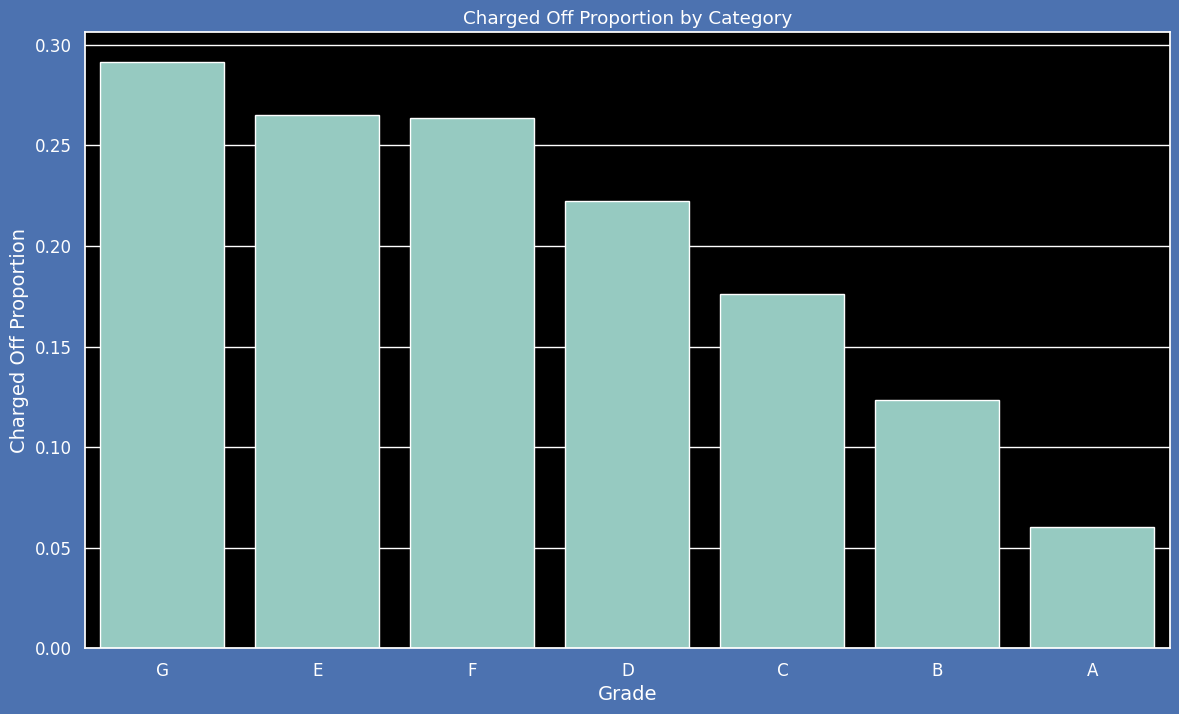

In [86]:
plot_charged_off_proportion(calculate_charged_off_proportion(df, state_column='grade', status_column='loan_status'), 'grade')

sub grade với charge off

In [87]:
calculate_charged_off_proportion(df, state_column='sub_grade', status_column='loan_status')

loan_status,sub_grade,Charged Off,Fully Paid,Total,ChargedOff_Proportion
32,G3,1.0,0.0,1.0,1.000000
33,G4,2.0,0.0,2.0,1.000000
29,F5,22.0,31.0,53.0,0.415094
31,G2,1.0,2.0,3.0,0.333333
27,F3,28.0,59.0,87.0,0.321839
23,E4,116.0,273.0,389.0,0.298201
28,F4,21.0,55.0,76.0,0.276316
20,E1,184.0,487.0,671.0,0.274218
21,E2,147.0,410.0,557.0,0.263914
19,D5,199.0,581.0,780.0,0.255128


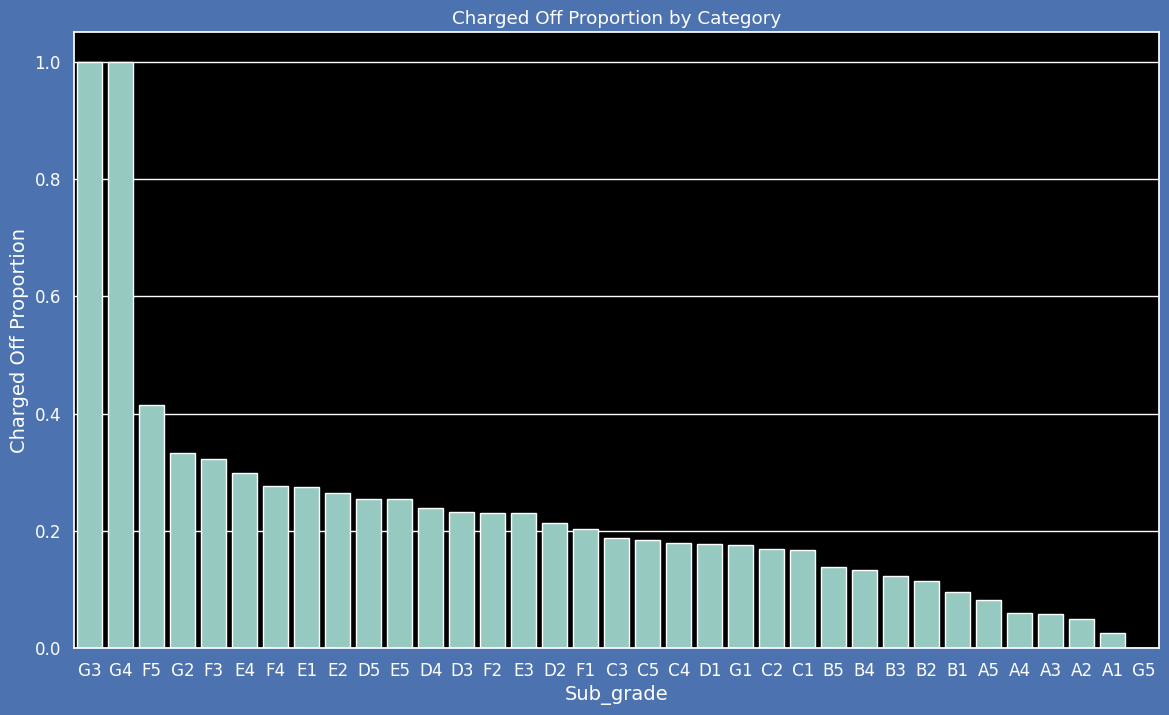

In [88]:
plot_charged_off_proportion(calculate_charged_off_proportion(df, state_column='sub_grade', status_column='loan_status'), 'sub_grade')

 interest rate against

In [89]:
calculate_charged_off_proportion(df, state_column='interest_rate_categories', status_column='loan_status')

loan_status,interest_rate_categories,Charged Off,Fully Paid,Total,ChargedOff_Proportion
3,16+,1177,3102,4279,0.275064
2,12.5-16,1905,8848,10753,0.177160
1,10-13,1162,7542,8704,0.133502
0,0-10,770,10586,11356,0.067806


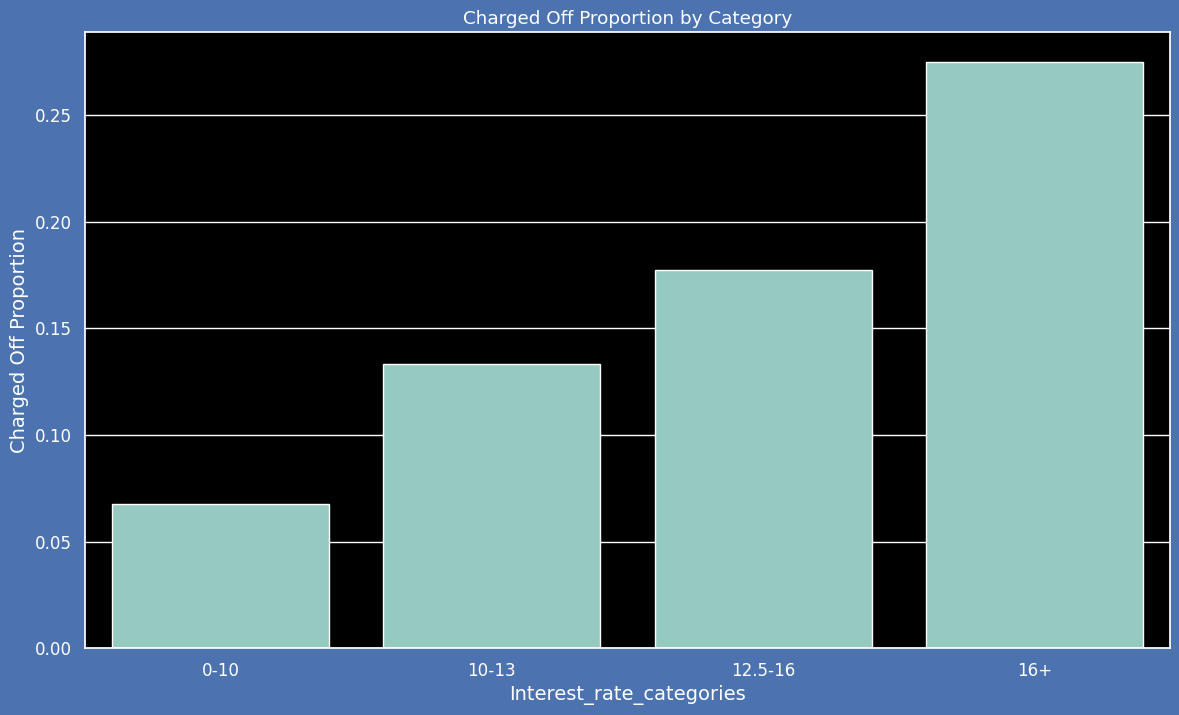

In [90]:
plot_charged_off_proportion(calculate_charged_off_proportion(df, state_column='interest_rate_categories', status_column='loan_status'), 'interest_rate_categories')

employment length với Charged Off

In [91]:
calculate_charged_off_proportion(df, state_column='emp_length', status_column='loan_status')

loan_status,emp_length,Charged Off,Fully Paid,Total,ChargedOff_Proportion
0,0,208,756,964,0.215768
10,10,1159,6321,7480,0.154947
7,7,231,1332,1563,0.147793
8,8,184,1104,1288,0.142857
5,5,412,2505,2917,0.141241
1,1,992,6115,7107,0.139581
3,3,504,3187,3691,0.136548
6,6,269,1702,1971,0.136479
4,4,406,2642,3048,0.133202
2,2,512,3444,3956,0.129424


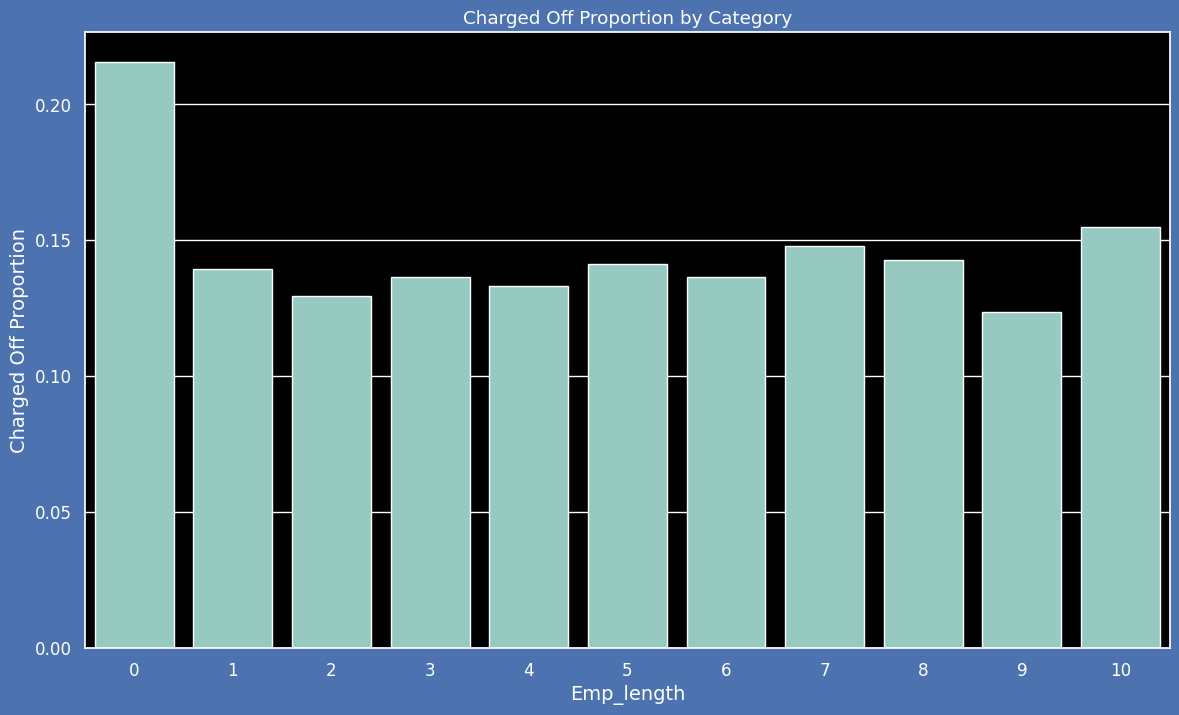

In [92]:
plot_charged_off_proportion(calculate_charged_off_proportion(df, state_column='emp_length', status_column='loan_status'), 'emp_length')

address state với charge off

In [93]:
calculate_charged_off_proportion(df, state_column='addr_state', status_column='loan_status')

loan_status,addr_state,Charged Off,Fully Paid,Total,ChargedOff_Proportion
28,NE,1.0,2.0,3.0,0.333333
32,NV,100.0,339.0,439.0,0.227790
13,ID,1.0,4.0,5.0,0.200000
9,FL,445.0,2092.0,2537.0,0.175404
24,MO,106.0,508.0,614.0,0.172638
40,SD,10.0,49.0,59.0,0.169492
11,HI,25.0,124.0,149.0,0.167785
31,NM,28.0,142.0,170.0,0.164706
0,AK,11.0,56.0,67.0,0.164179
4,CA,1014.0,5335.0,6349.0,0.159710


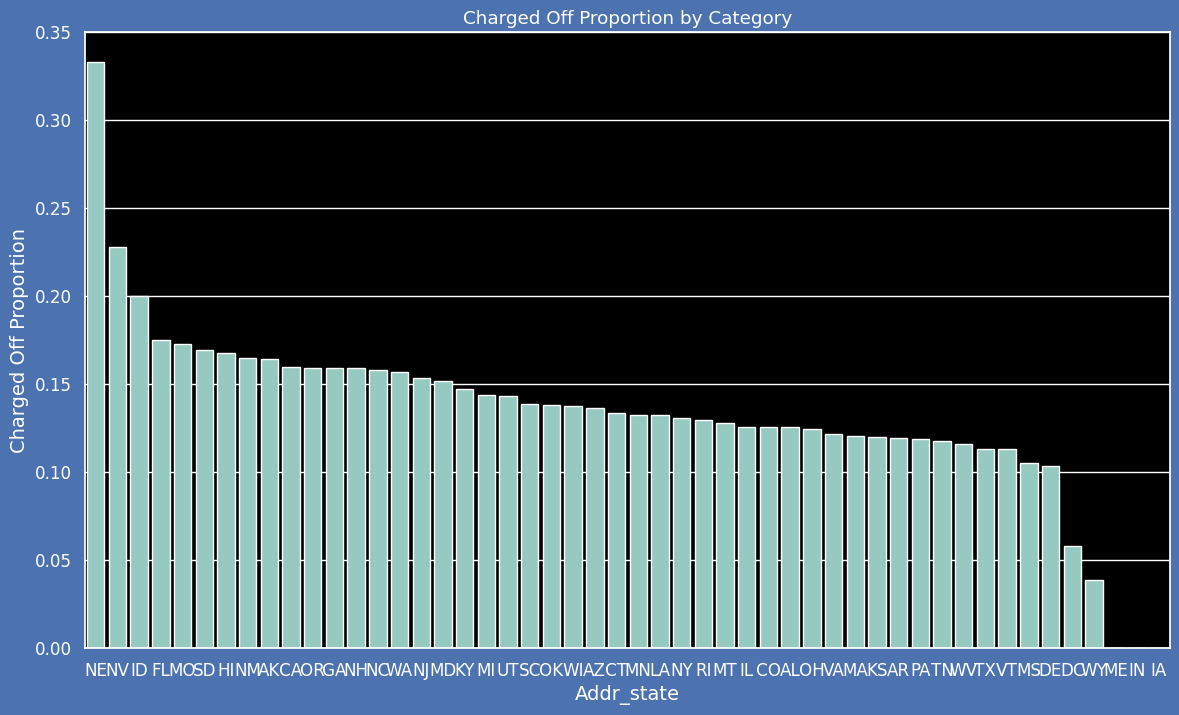

In [94]:
plot_charged_off_proportion(calculate_charged_off_proportion(df, state_column='addr_state', status_column='loan_status'), 'addr_state')

verification status với Charged Off

In [95]:
calculate_charged_off_proportion(df, state_column='verification_status', status_column='loan_status')

loan_status,verification_status,Charged Off,Fully Paid,Total,ChargedOff_Proportion
2,Verified,1730,8688,10418,0.166059
1,Source Verified,1269,7548,8817,0.143927
0,Not Verified,2015,13842,15857,0.127073


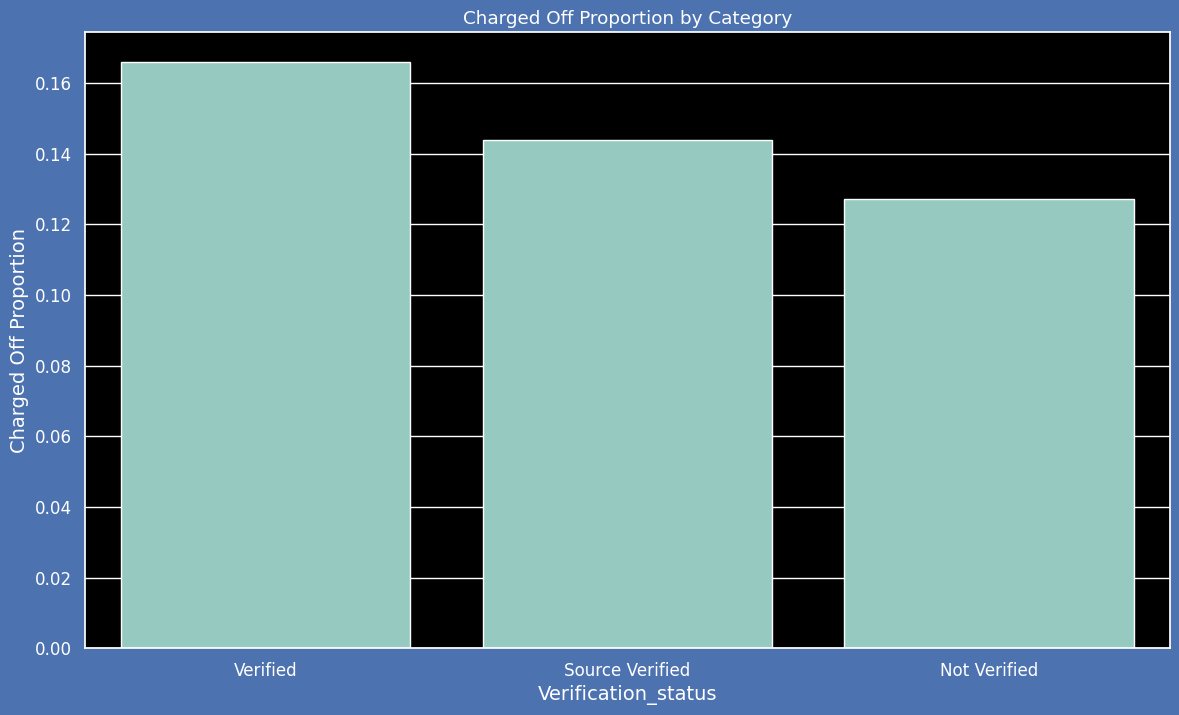

In [96]:
plot_charged_off_proportion(calculate_charged_off_proportion(df, state_column='verification_status', status_column='loan_status'), 'verification_status')

Derogatory Public Records với Charged Off

In [100]:
 calculate_charged_off_proportion(df, state_column='pub_rec', status_column='loan_status')

loan_status,pub_rec,Charged Off,Fully Paid,Total,ChargedOff_Proportion
2,2,10.0,34.0,44.0,0.227273
1,1,418.0,1474.0,1892.0,0.220930
0,0,4586.0,28563.0,33149.0,0.138345
3,3,0.0,5.0,5.0,0.000000
4,4,0.0,2.0,2.0,0.000000


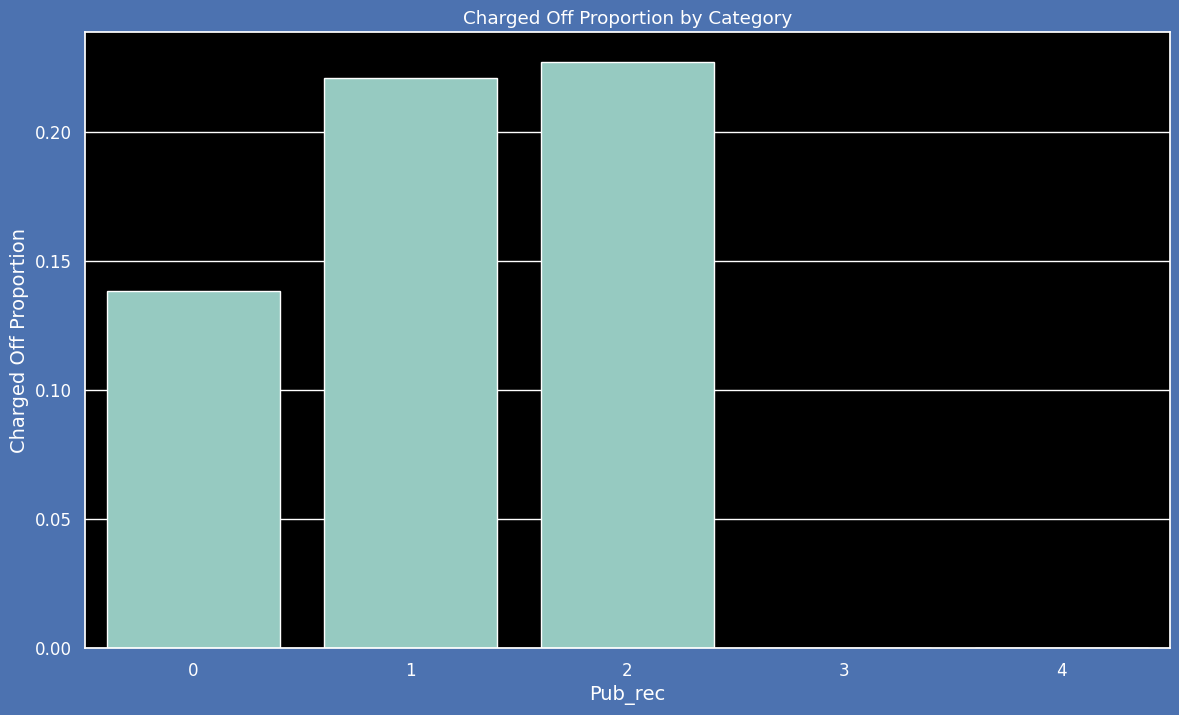

In [99]:
plot_charged_off_proportion(calculate_charged_off_proportion(df, state_column='pub_rec', status_column='loan_status'), 'pub_rec')